In [ ]:
# Import necessary libraries

# for Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for Data Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Models to be experimented
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.neighbors import KNeighborsClassifier  # KNN Classifier

# Evaluation Metrics for evaluations
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score

%matplotlib inline

In [ ]:
# To prevent FutureWarning display in output since the warning category is non-critical in experiment
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load the csv file and create a dataframe with the dataset

In [ ]:
df = pd.read_csv("0354208_Satoakilshihara_Find_a_best_Machine_Learning_Model_to_improve_Credit_Card_Fraud_Detection.ipynb")

## EDA

### Initial EDA

In [ ]:
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.323544e-16,-3.518788e-17,-2.879008e-17,7.197521e-18,-3.838678e-17,-3.198898e-17,2.069287e-17,9.116859e-17,...,4.758361e-17,5.398140e-18,5.395017e-18,-1.999311e-18,-3.028957e-17,-7.547400e-18,-3.598760e-17,2.499139e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
df.shape

(568630, 31)

In [ ]:
df.isna().sum().max()

0

In [ ]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset


### Descriptive EDA with Visualization

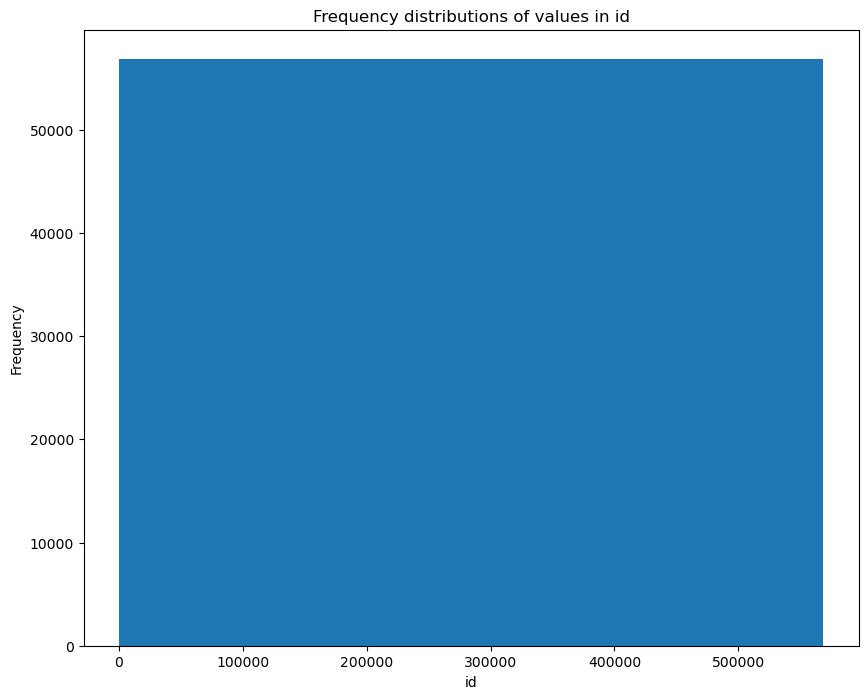

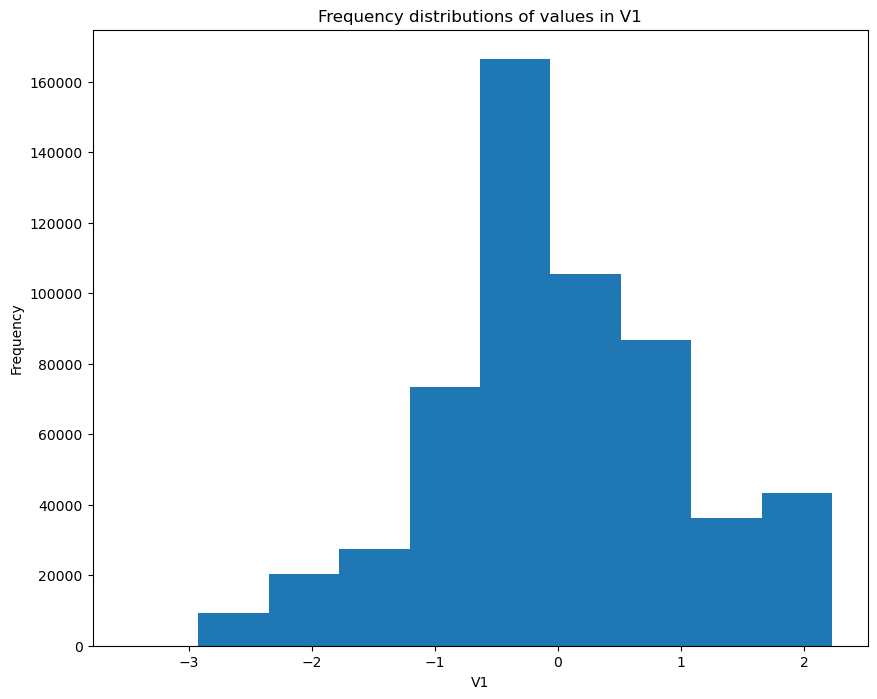

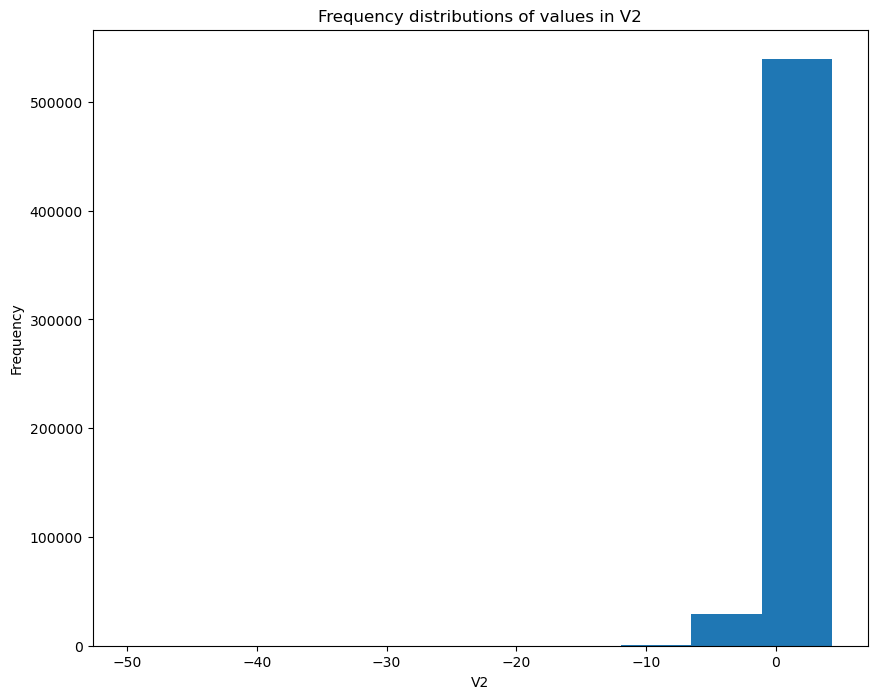

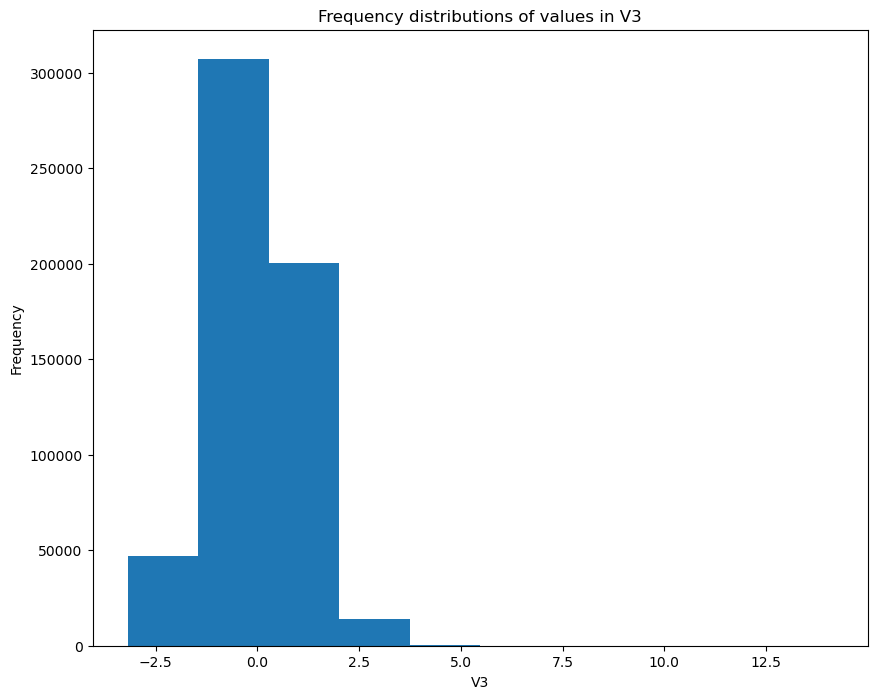

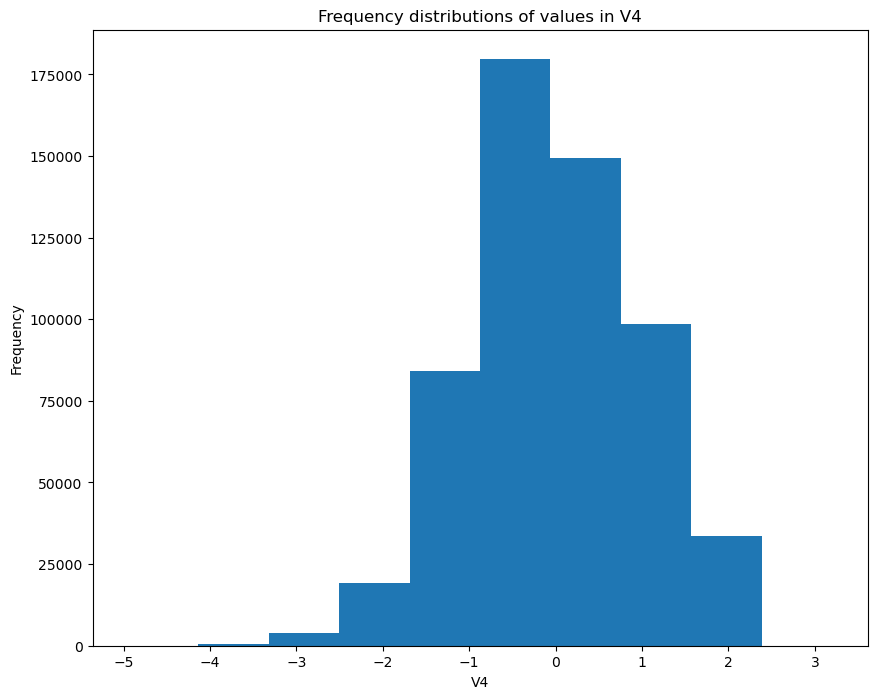

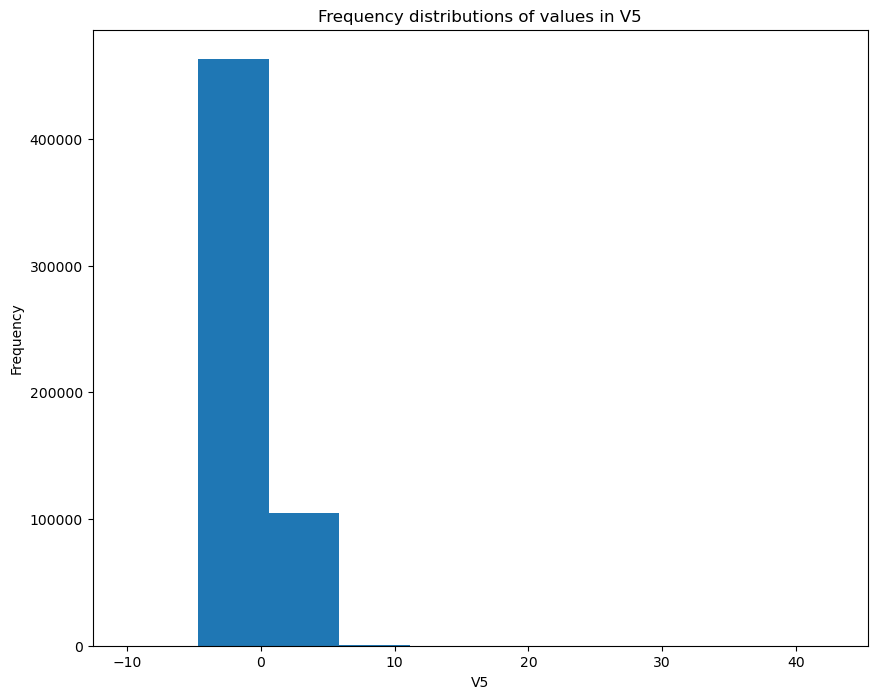

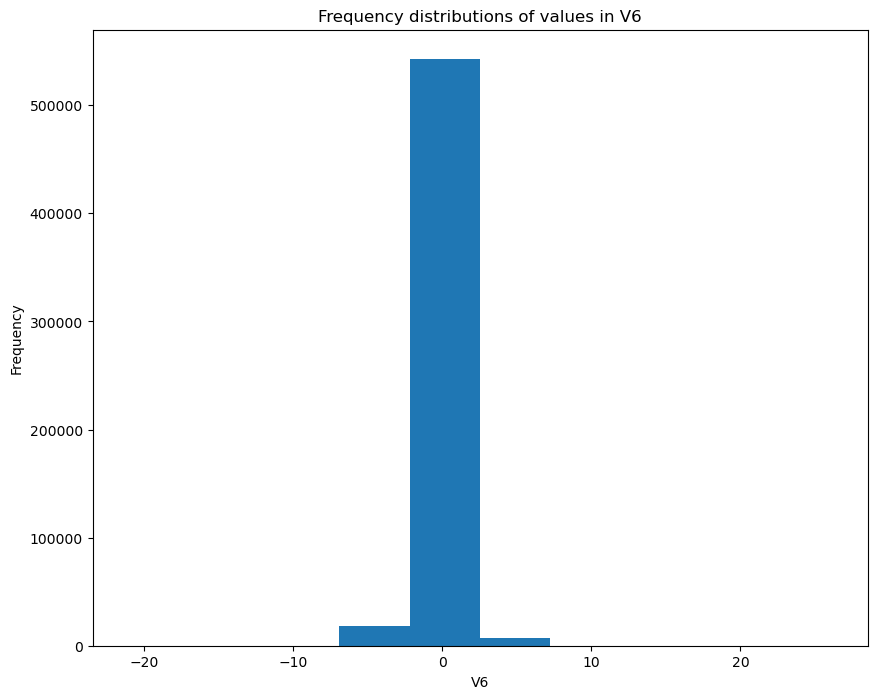

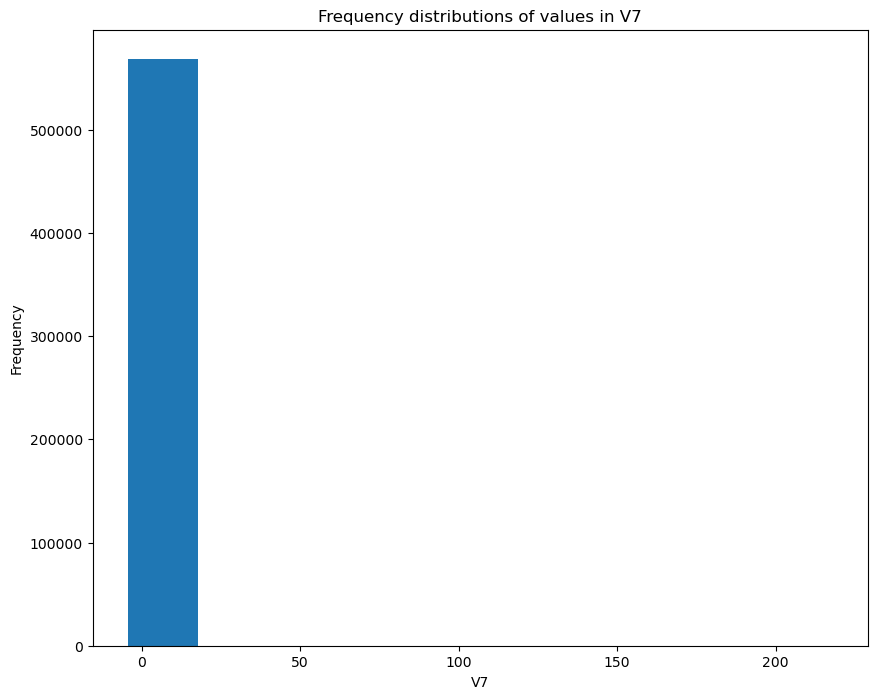

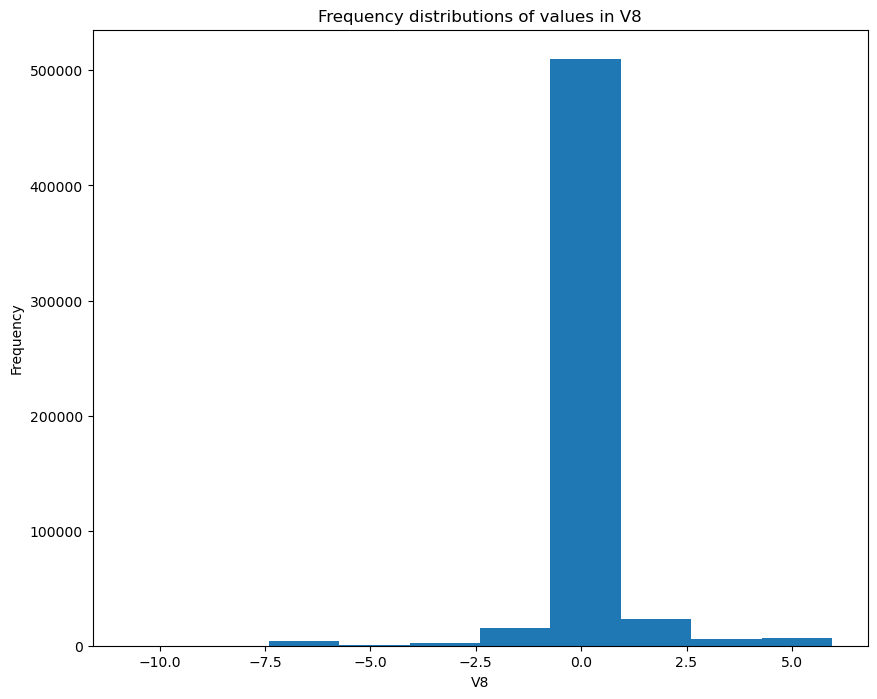

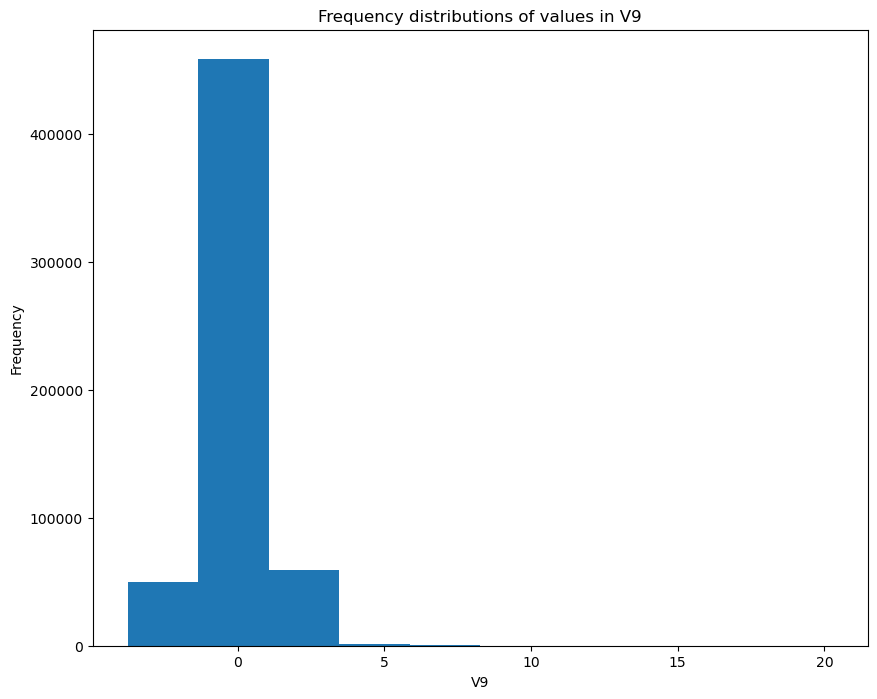

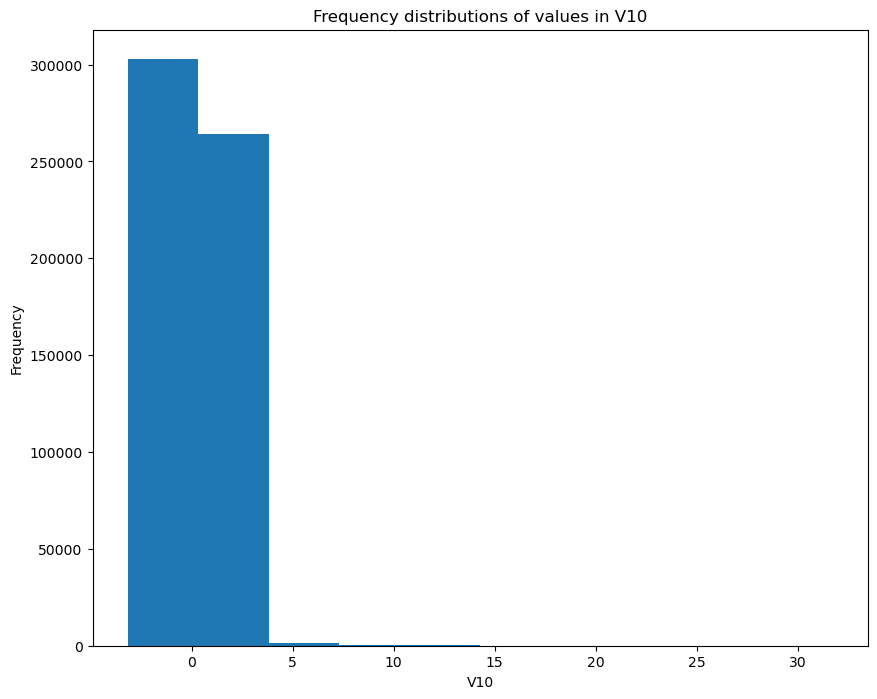

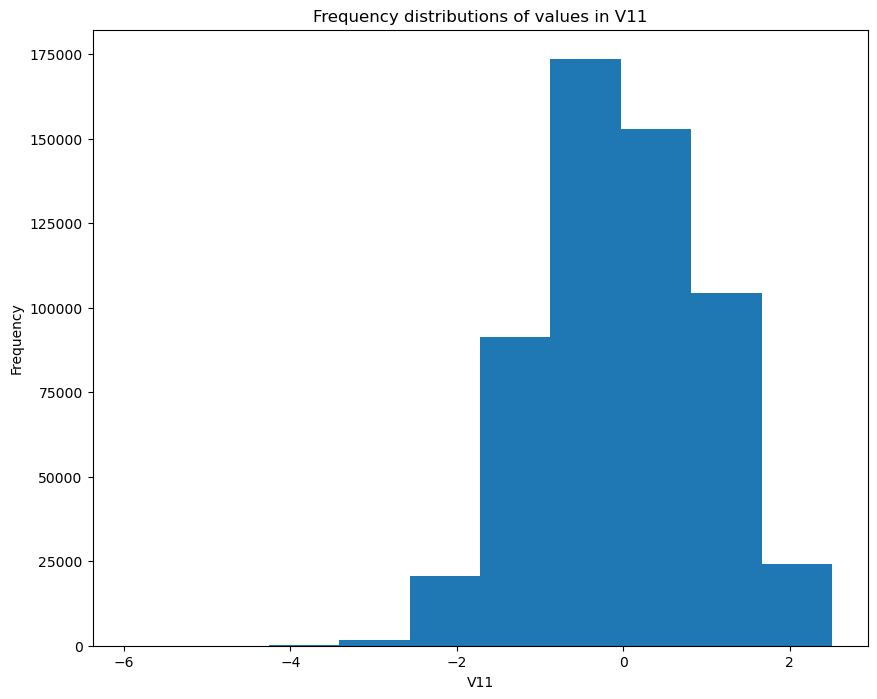

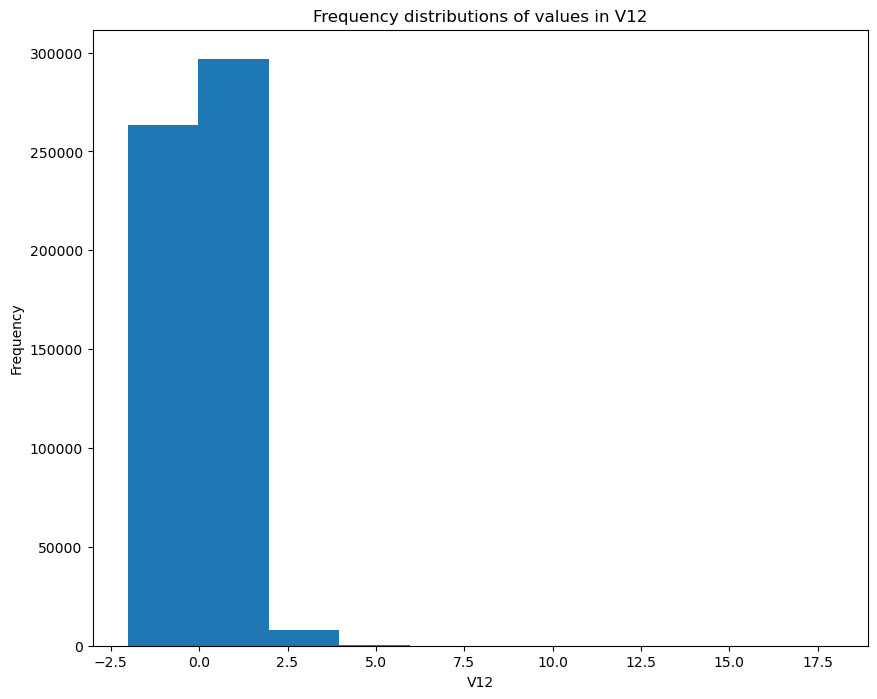

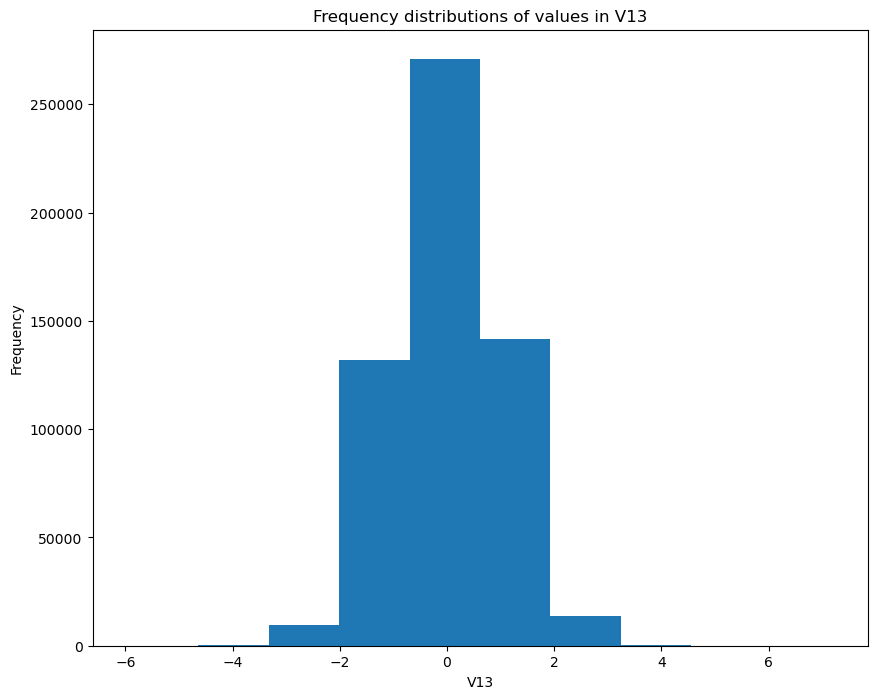

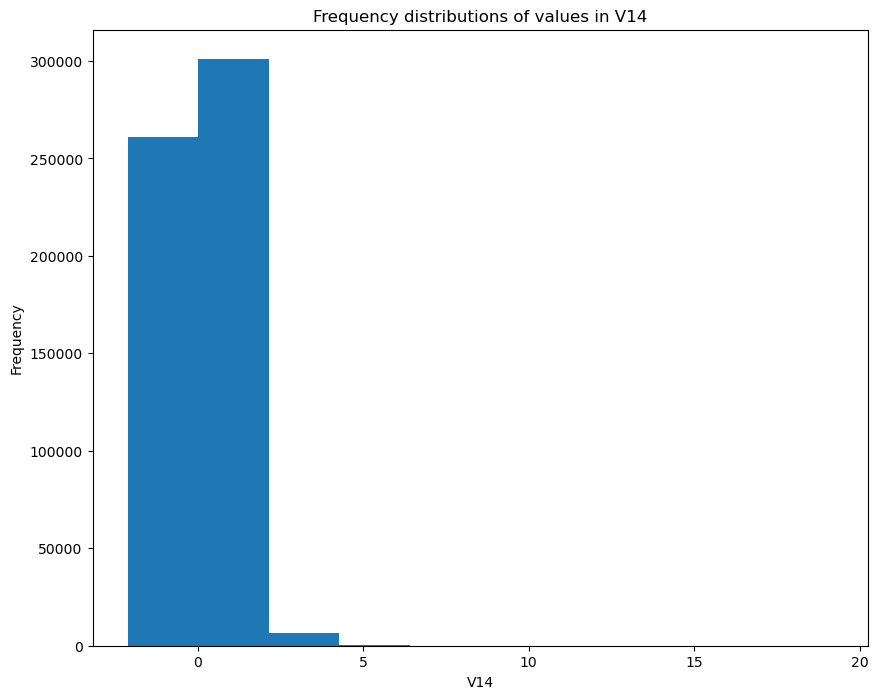

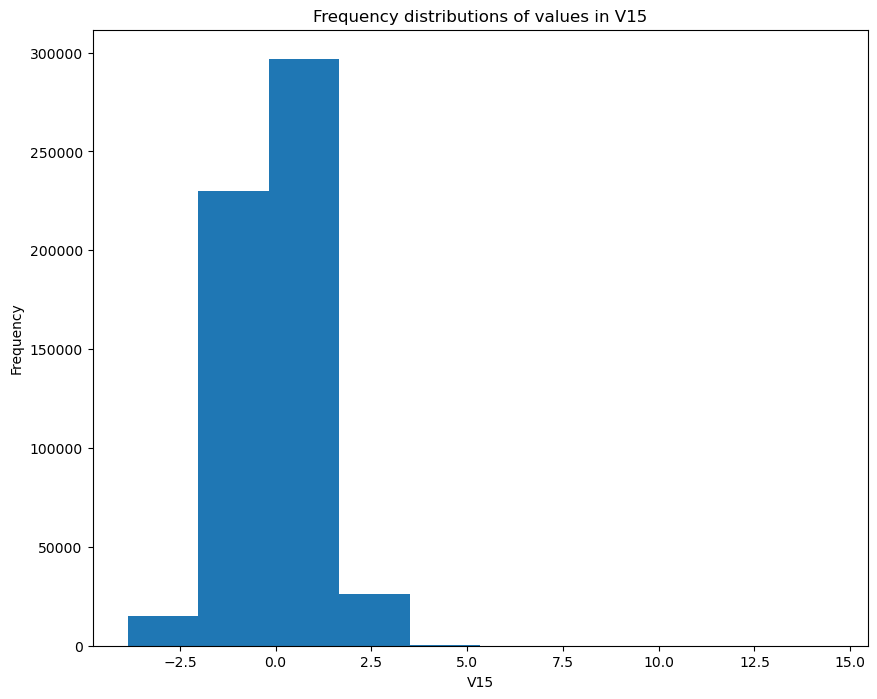

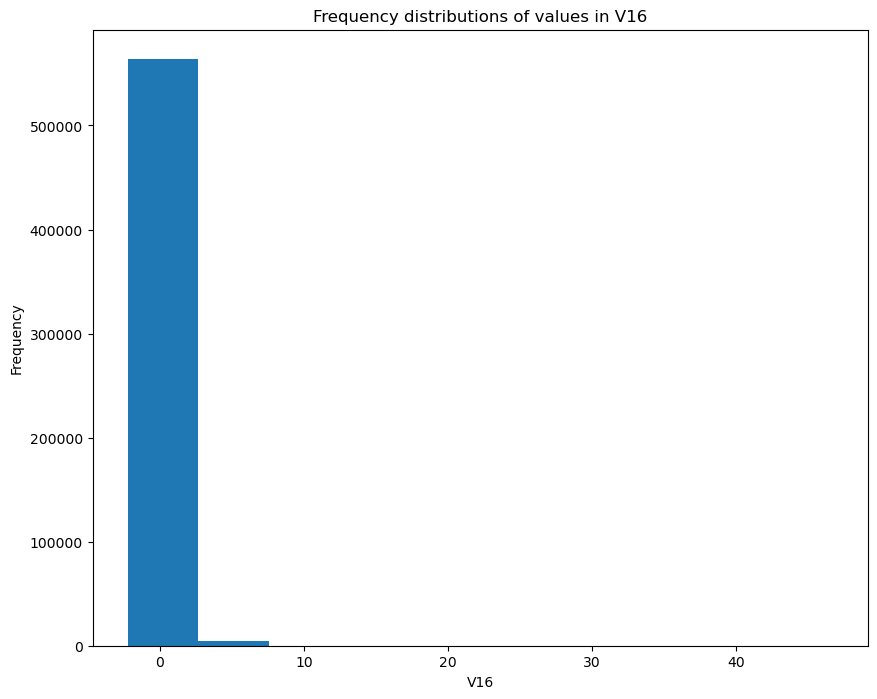

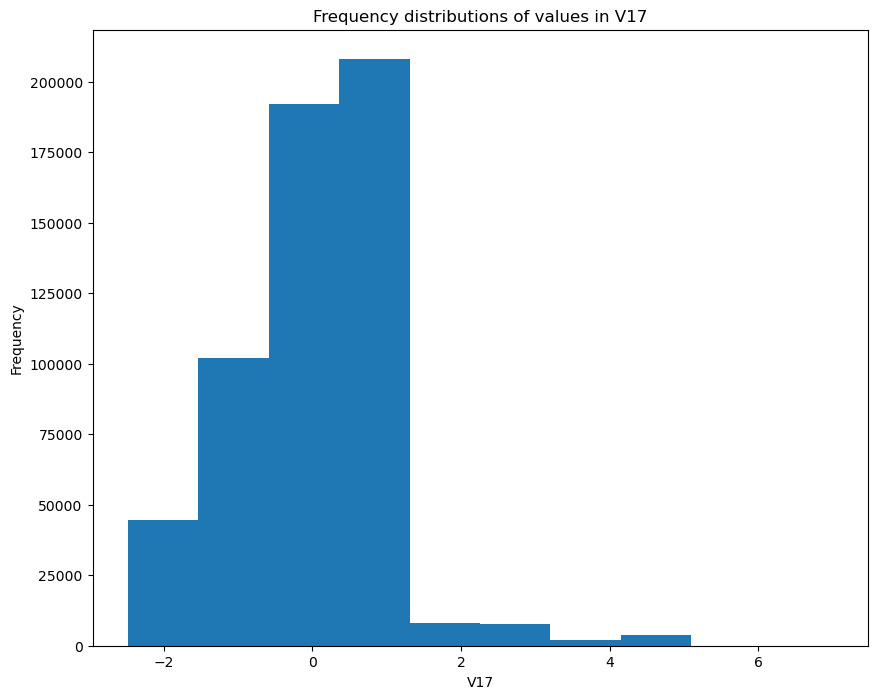

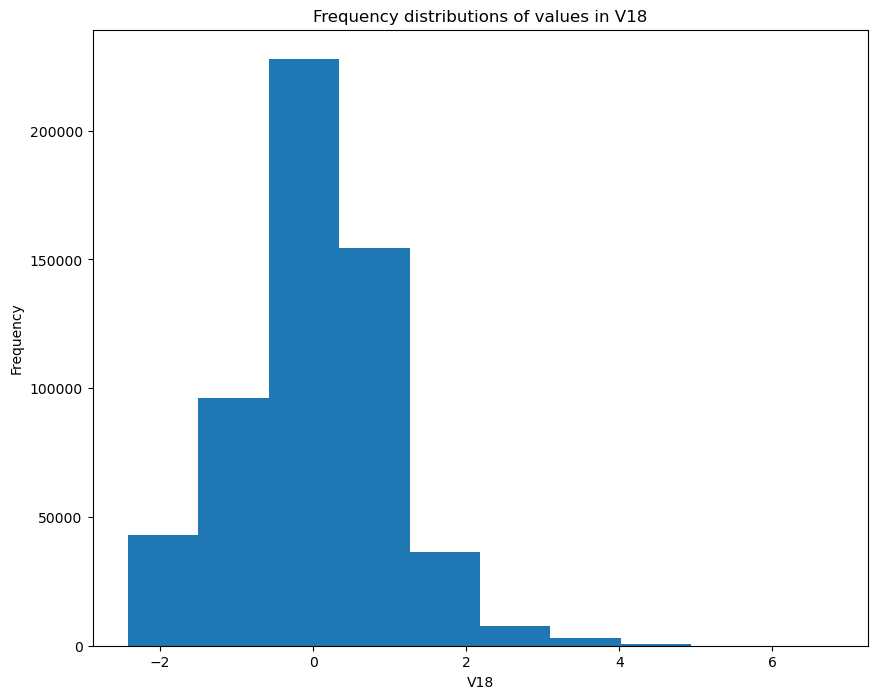

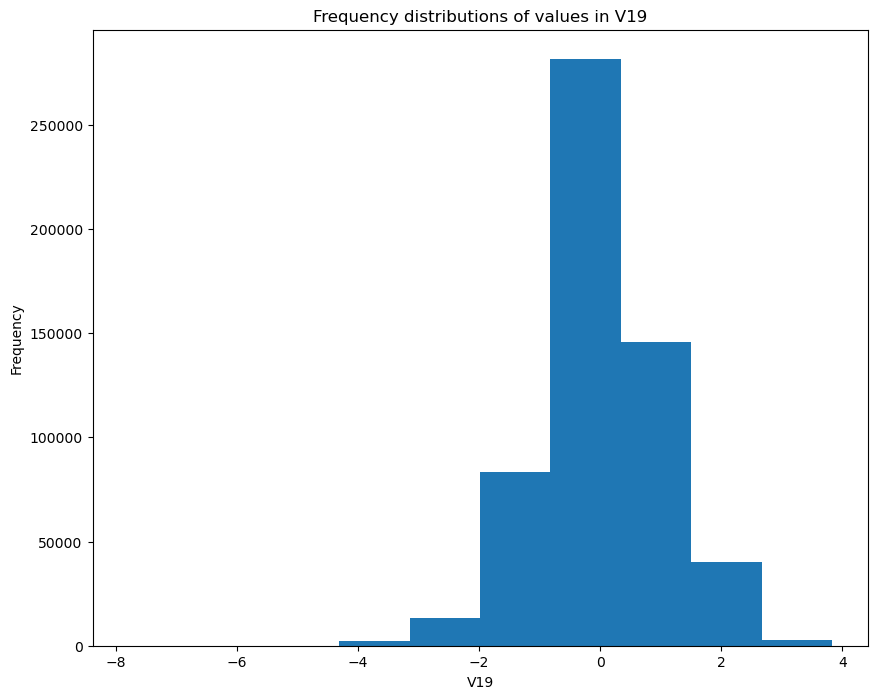

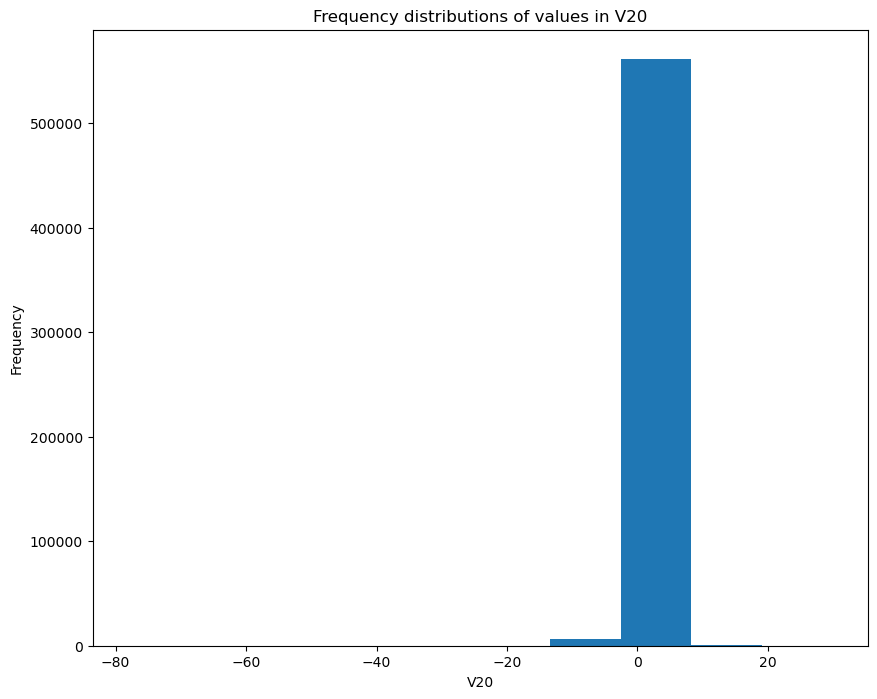

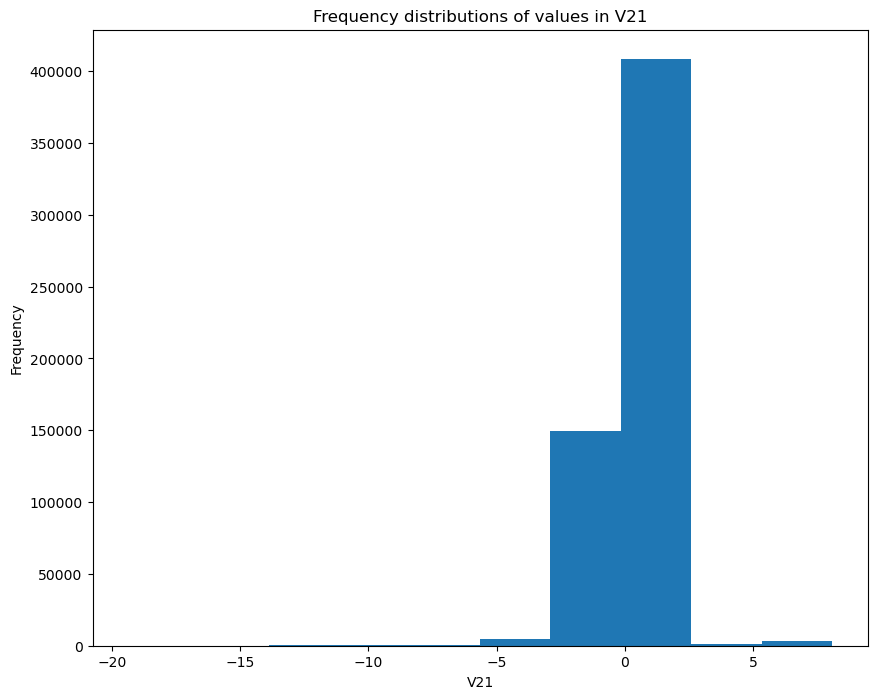

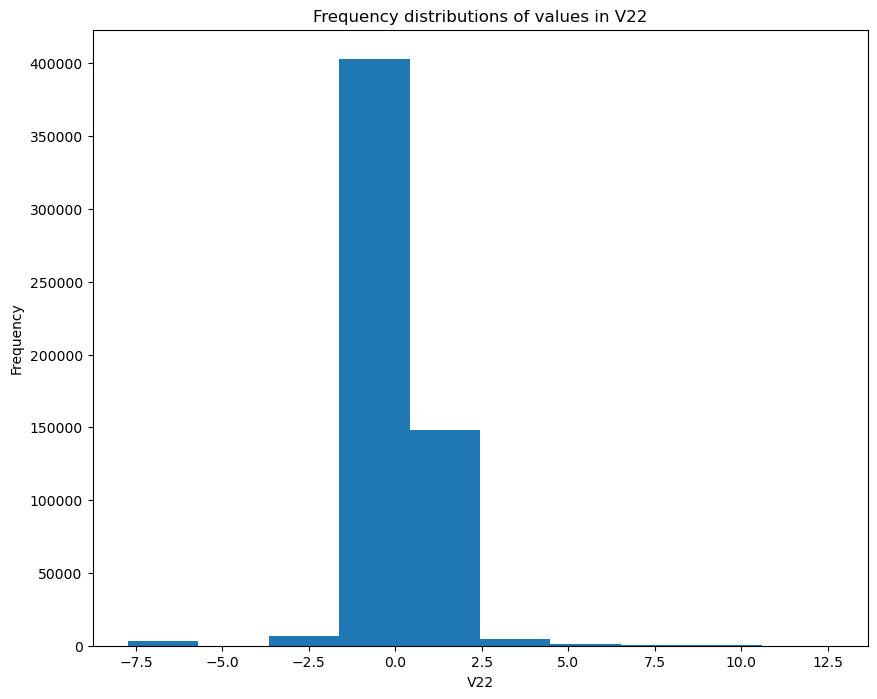

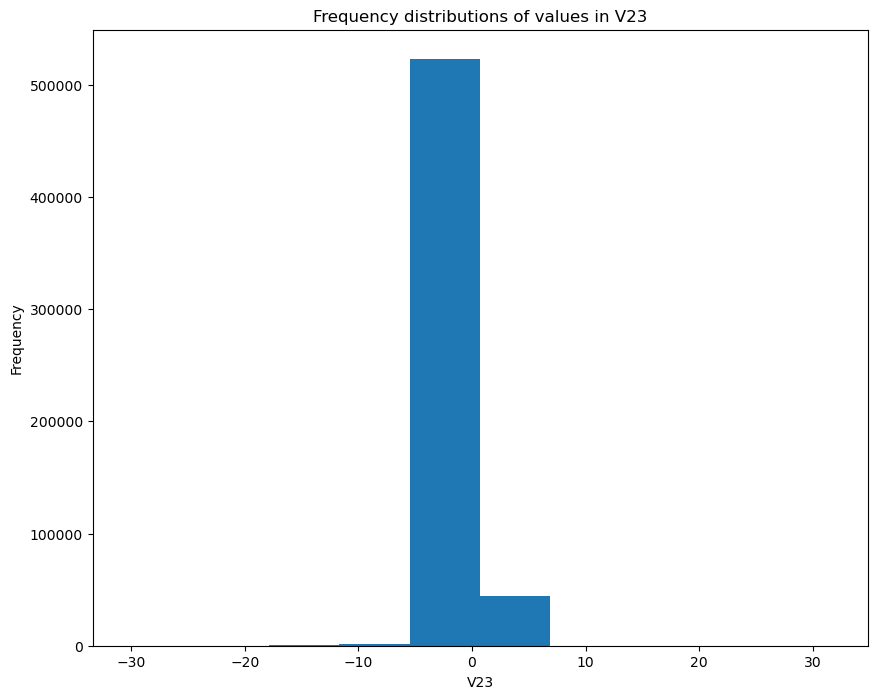

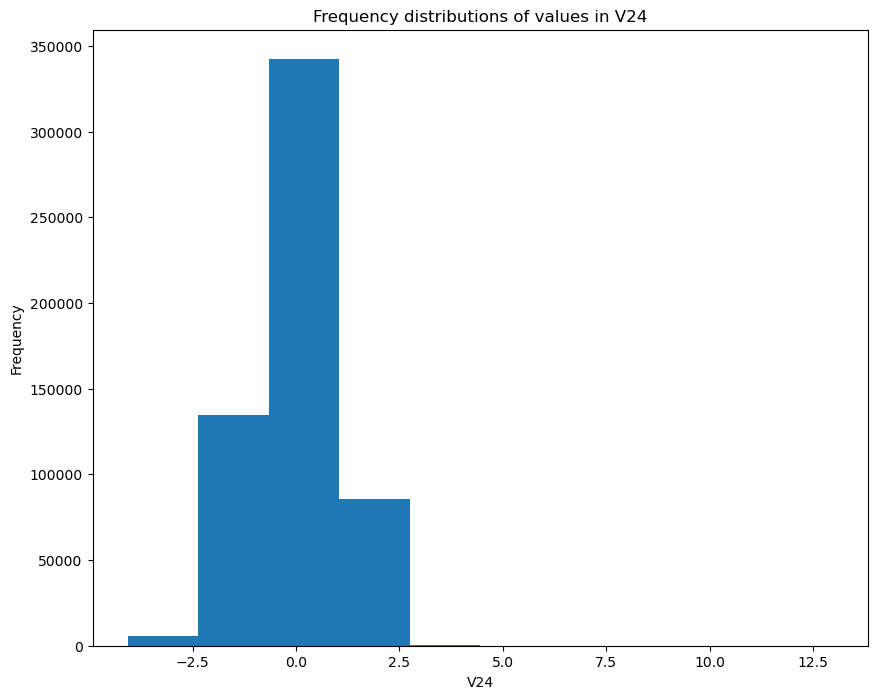

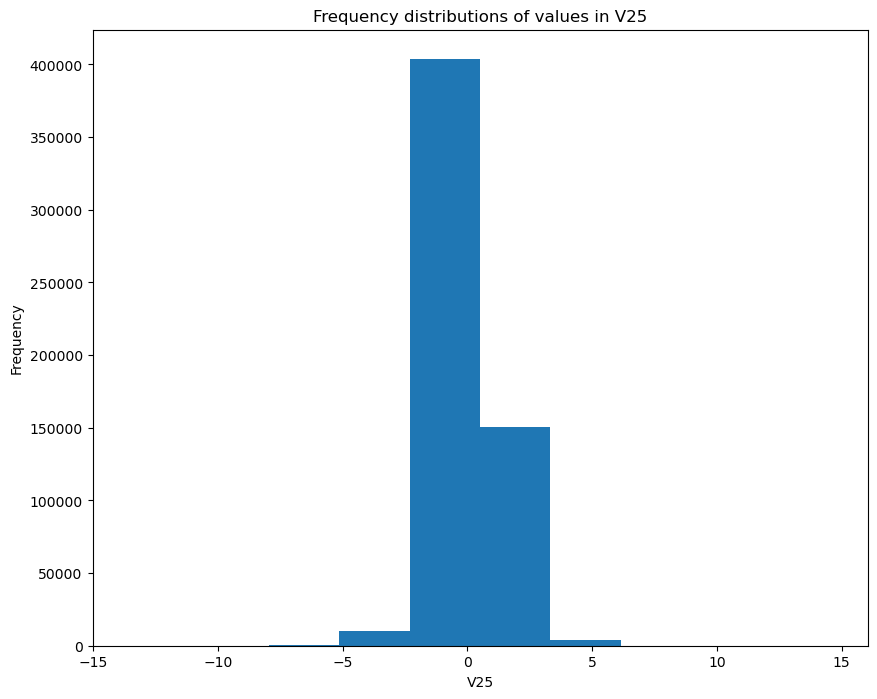

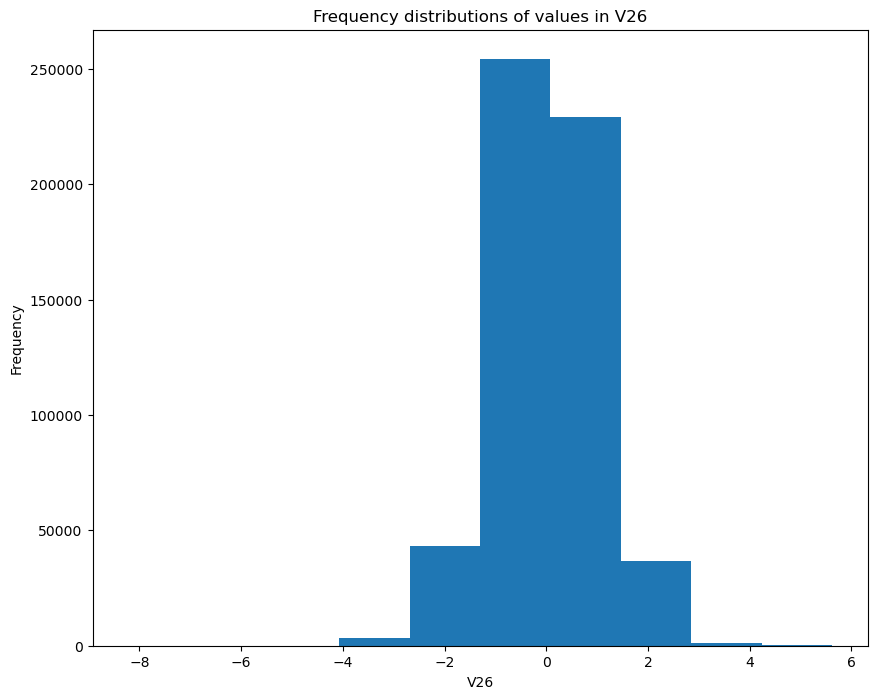

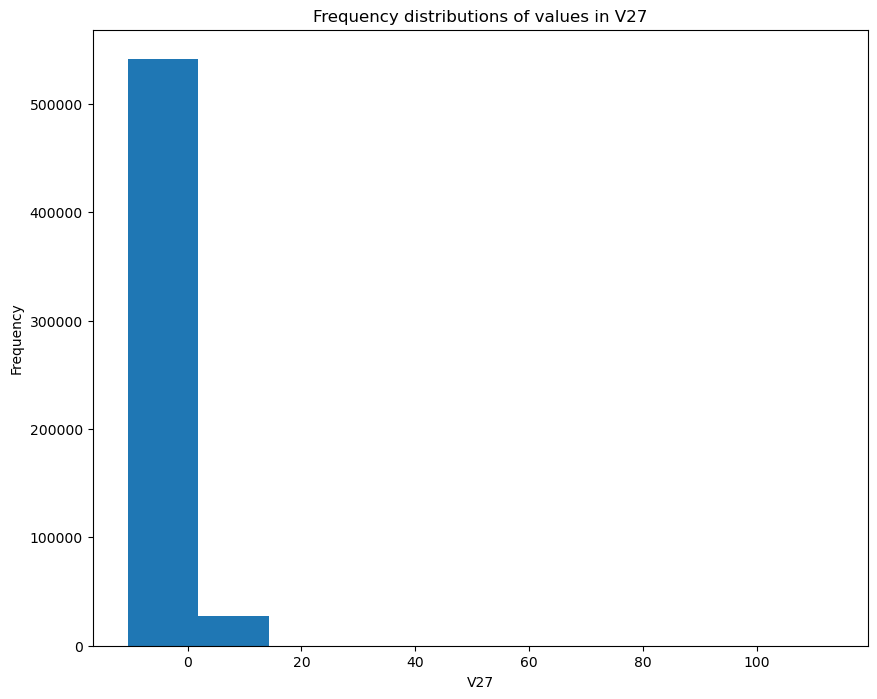

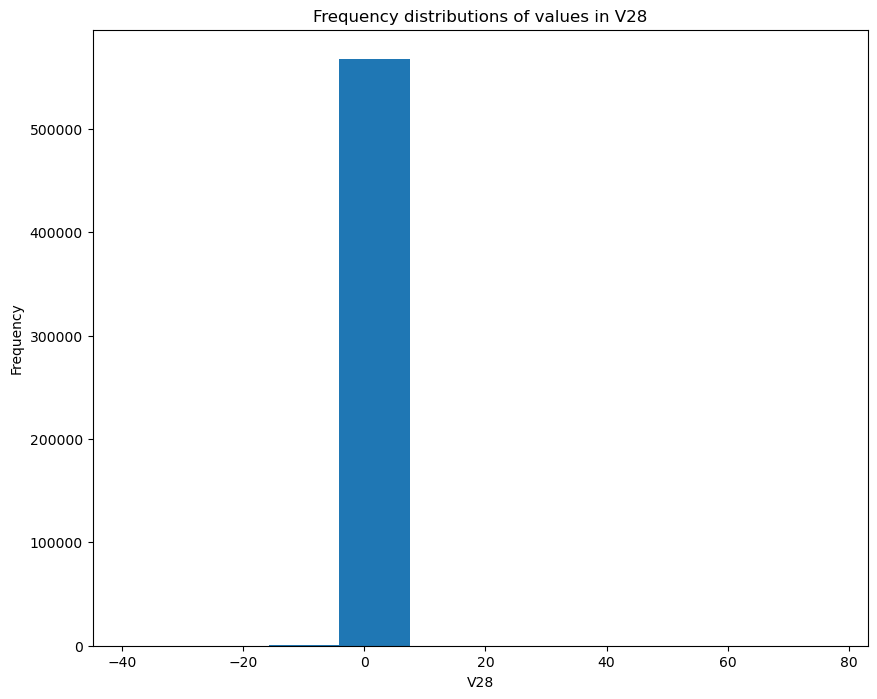

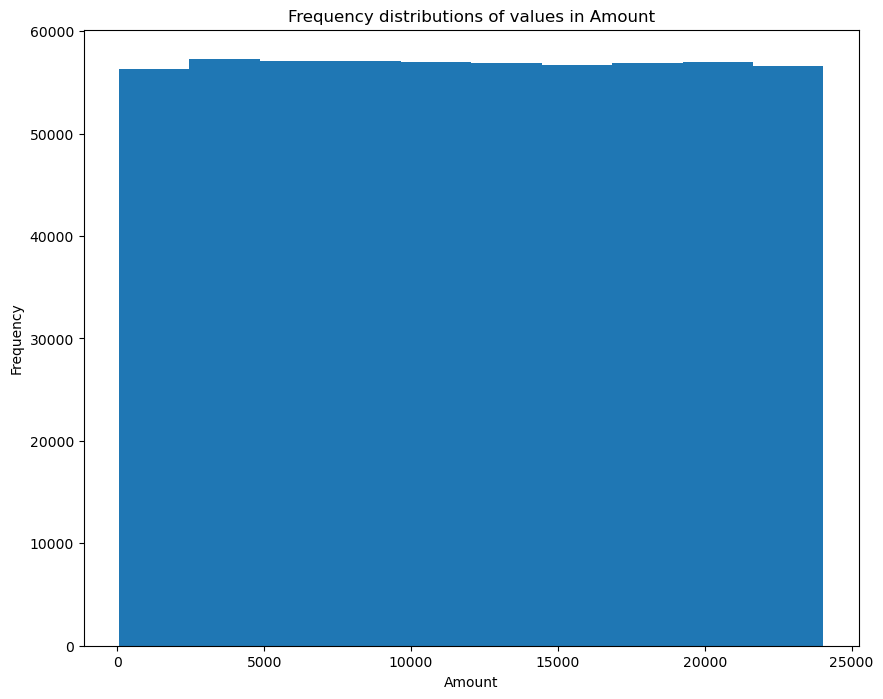

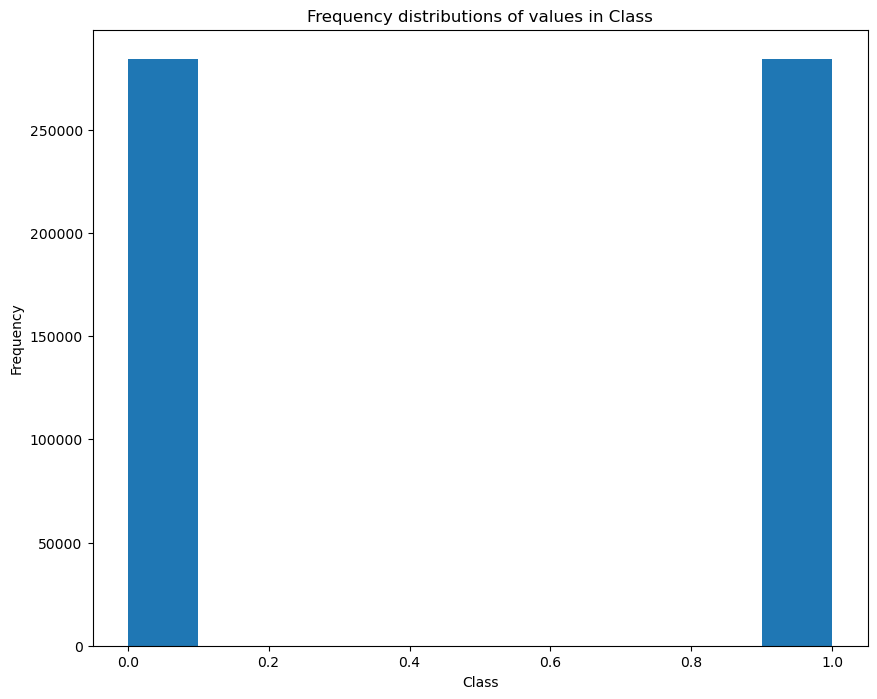

In [ ]:
# Scatter Plot
for column in df:
    plt.figure(figsize = (10, 8))
    plt.hist(df[column])
    plt.title(f"Frequency distributions of values in {column}")
    plt.xlabel(f"{column}")
    plt.ylabel("Frequency")
    plt.show()

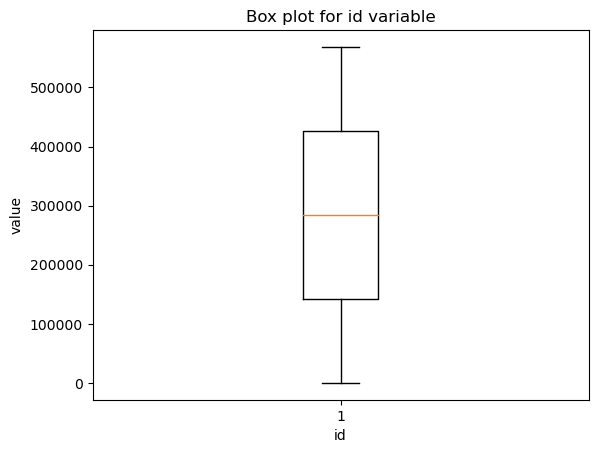

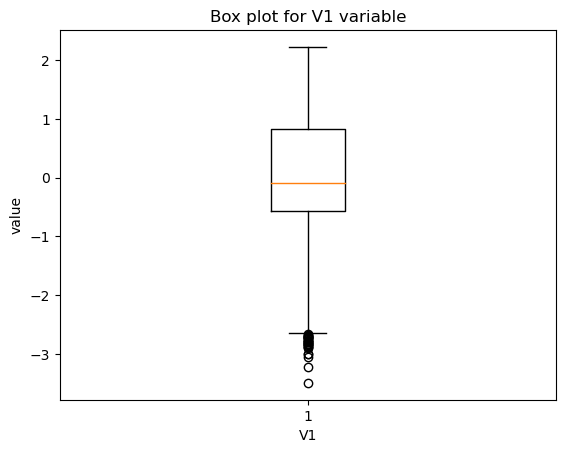

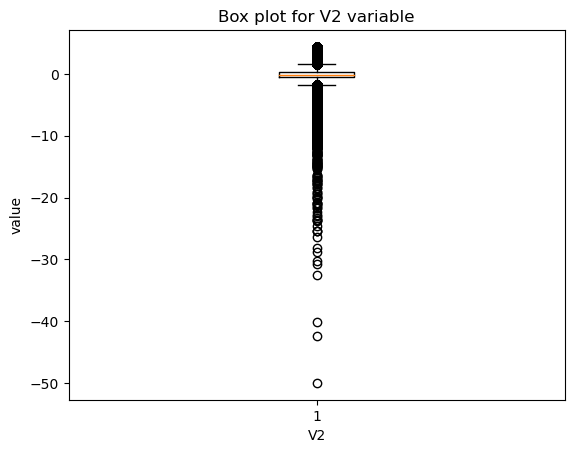

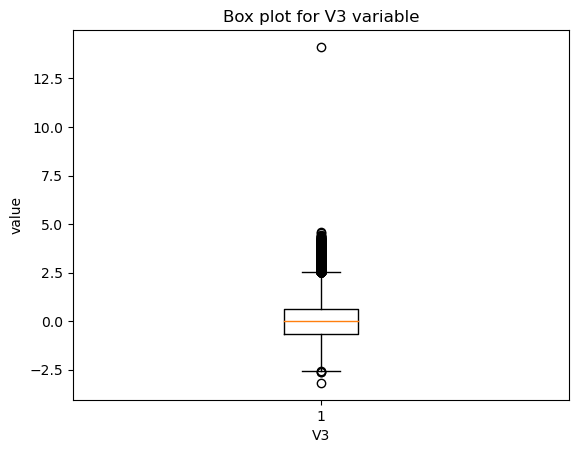

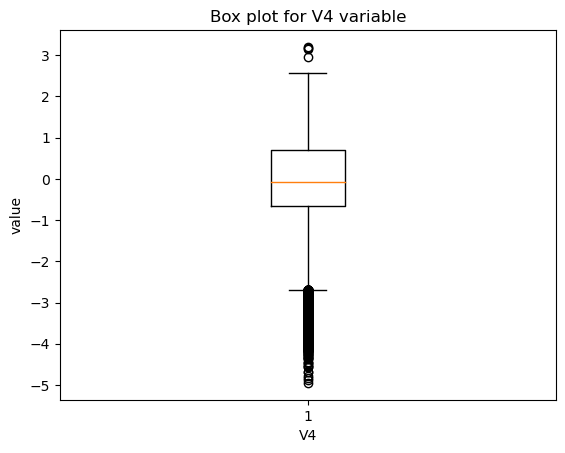

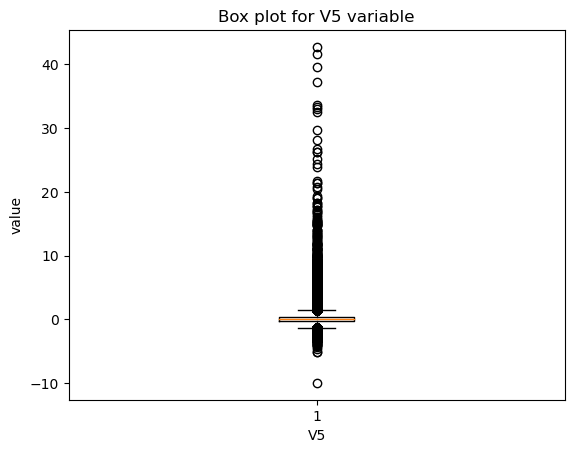

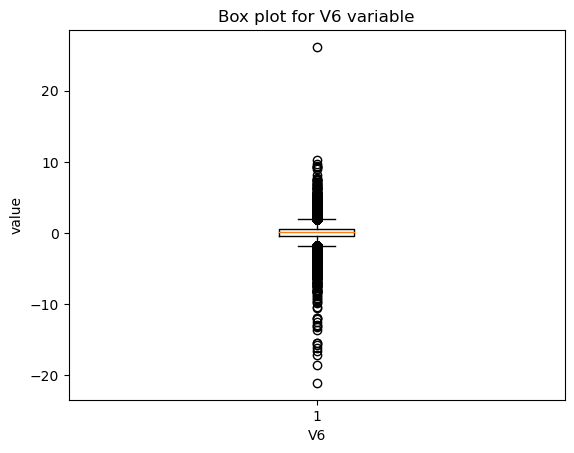

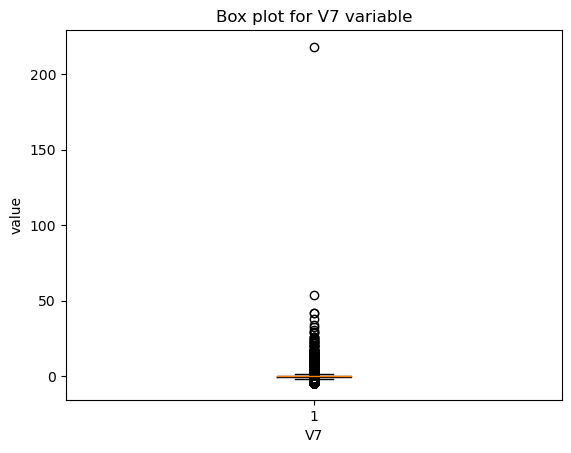

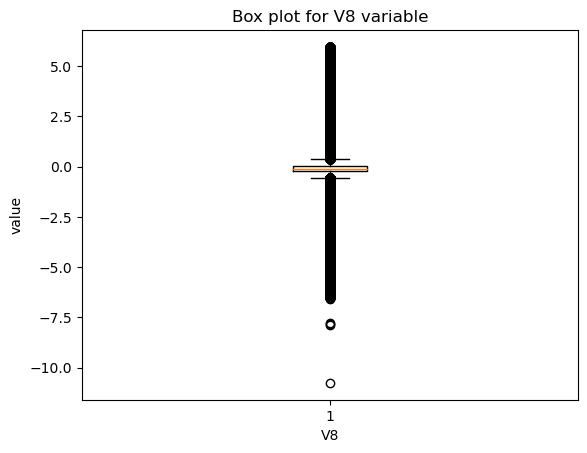

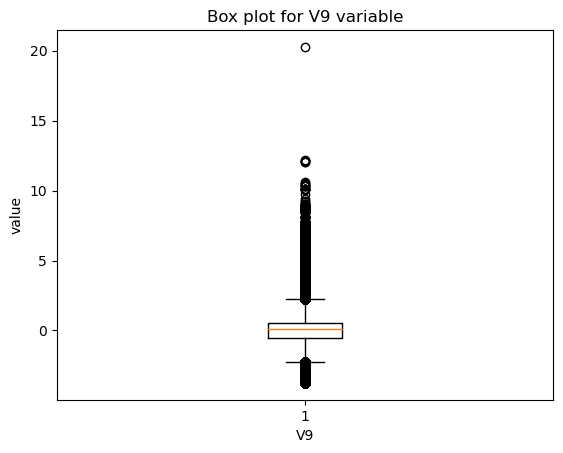

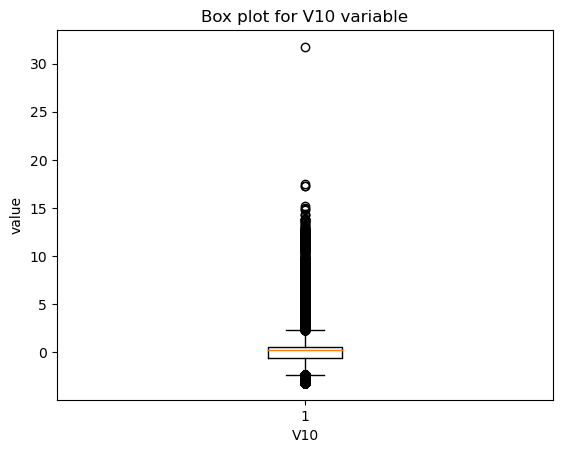

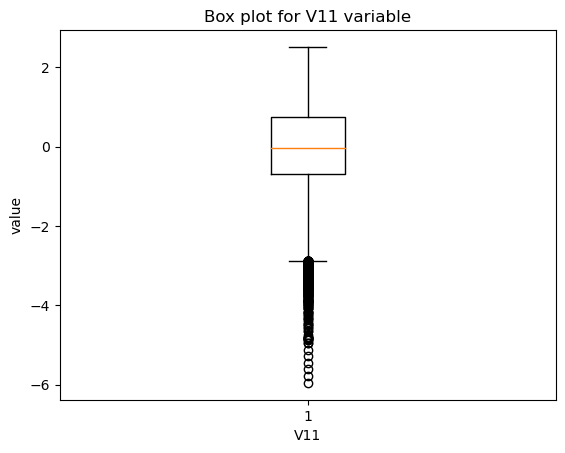

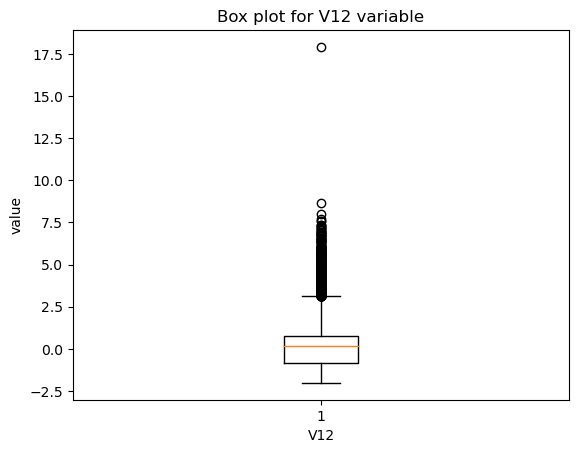

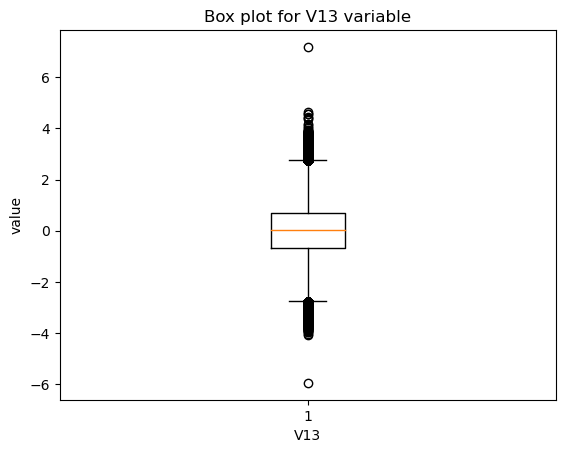

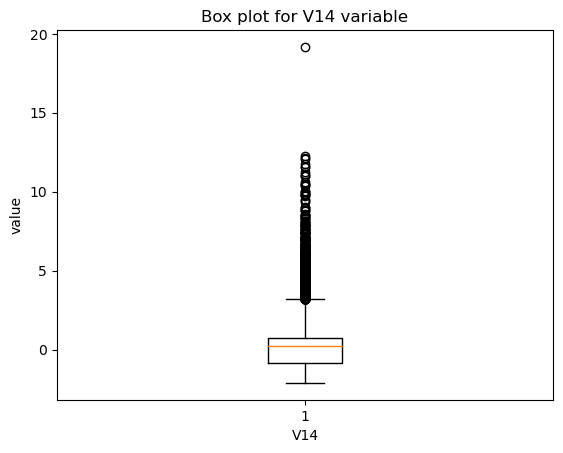

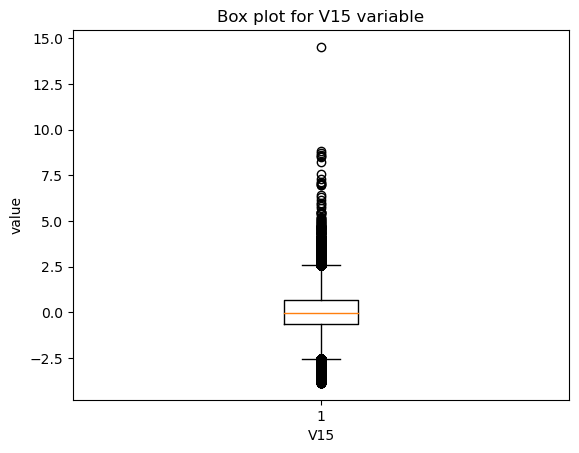

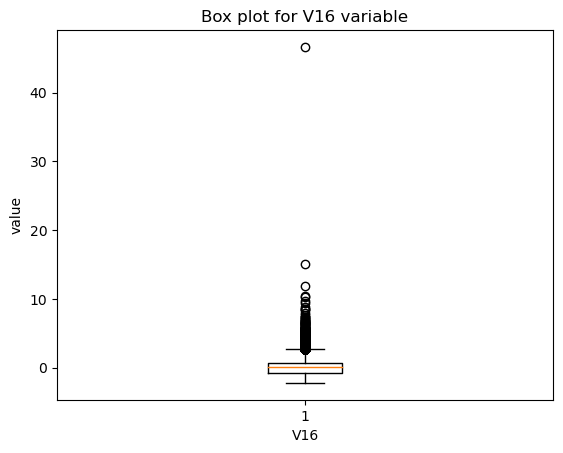

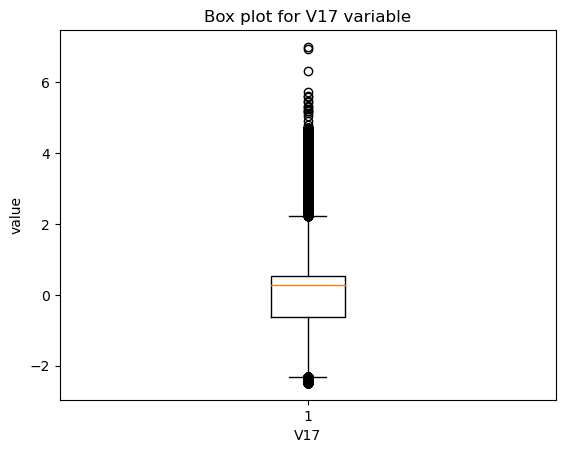

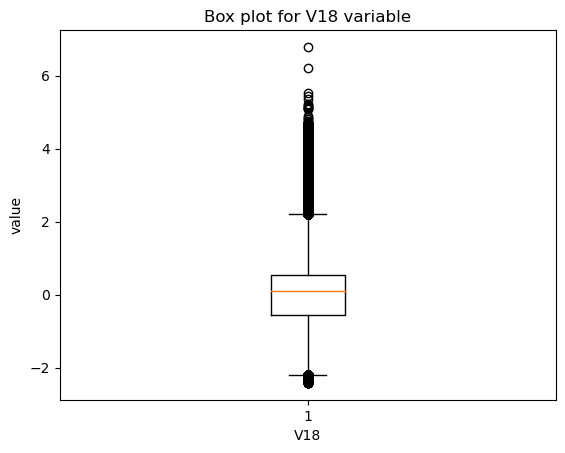

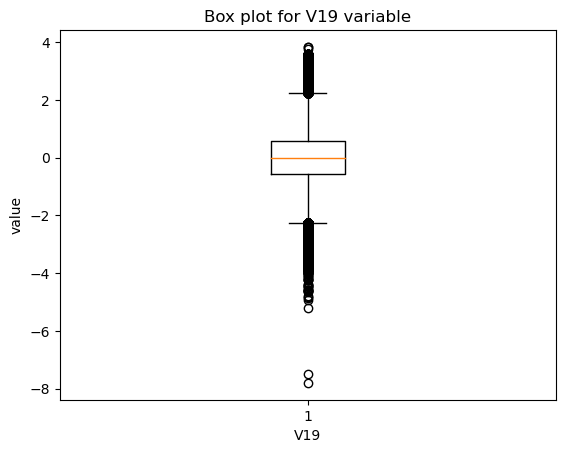

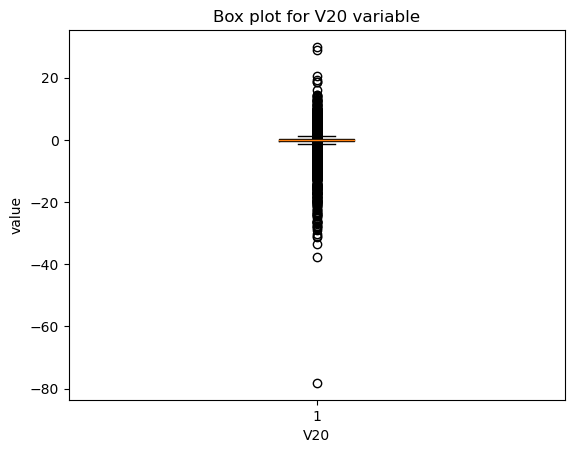

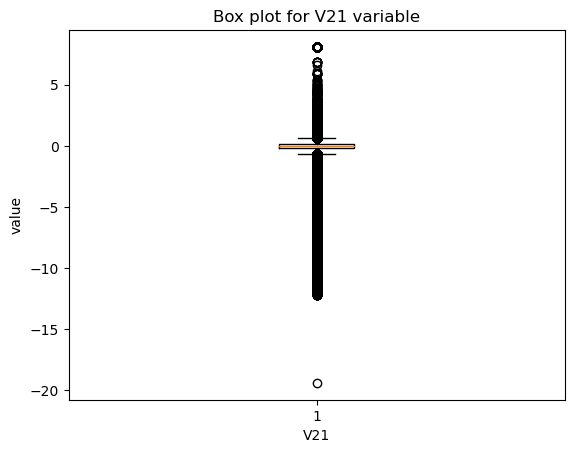

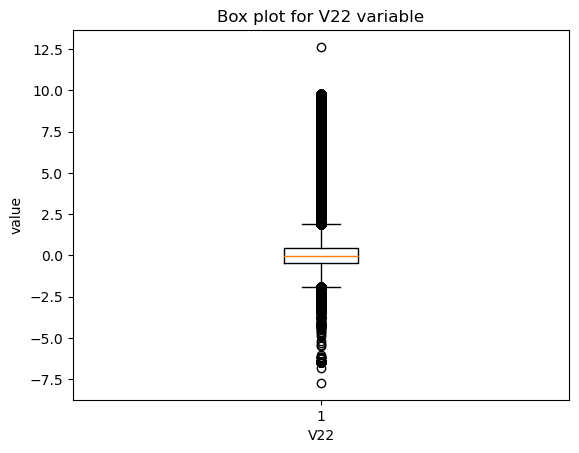

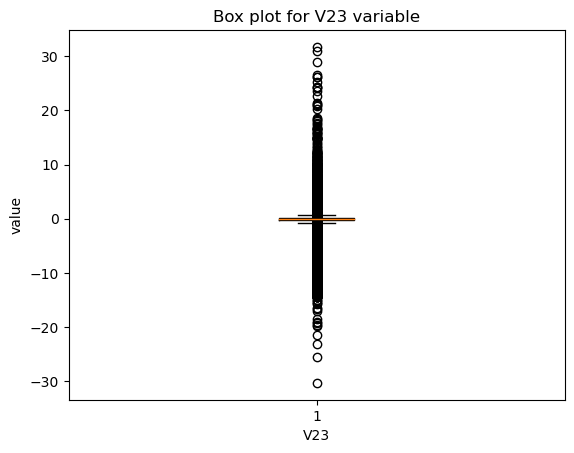

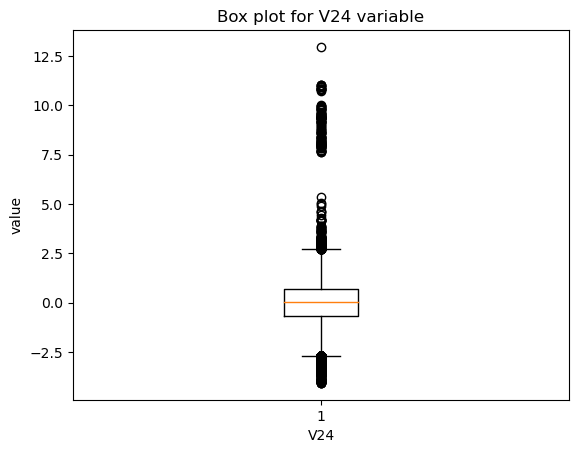

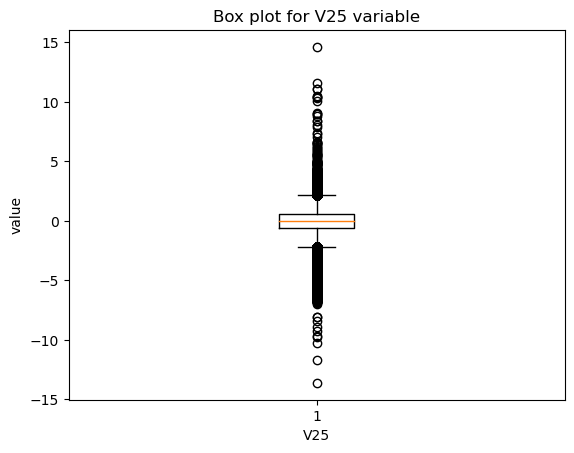

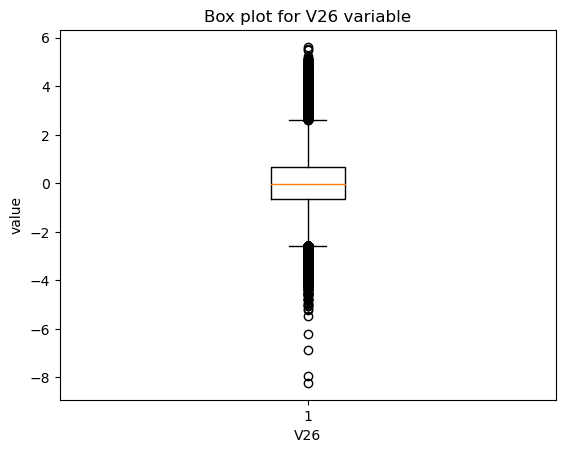

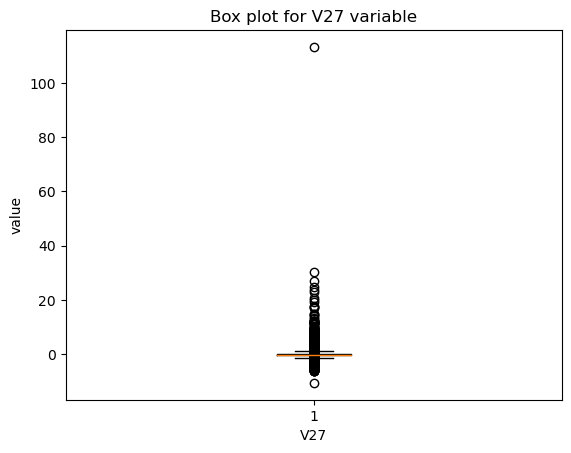

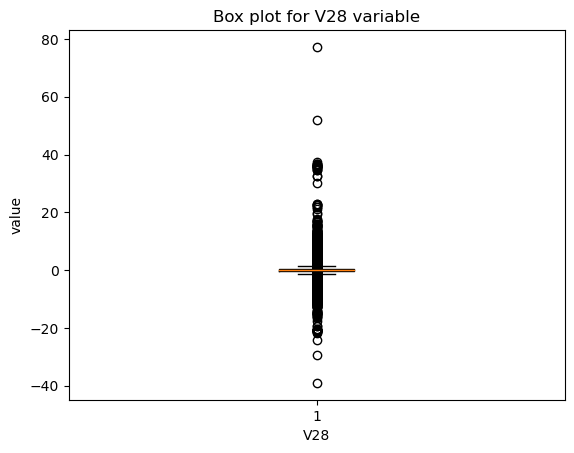

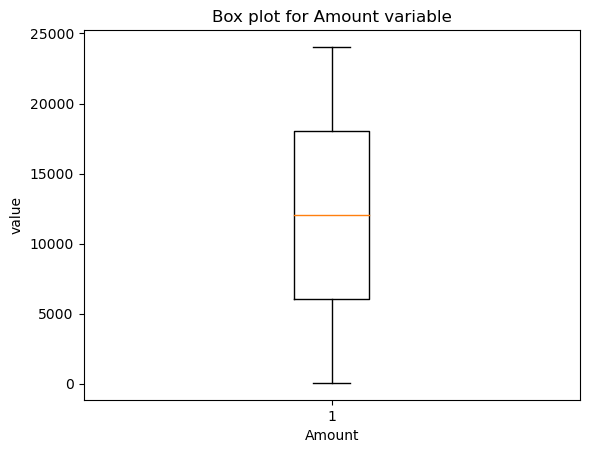

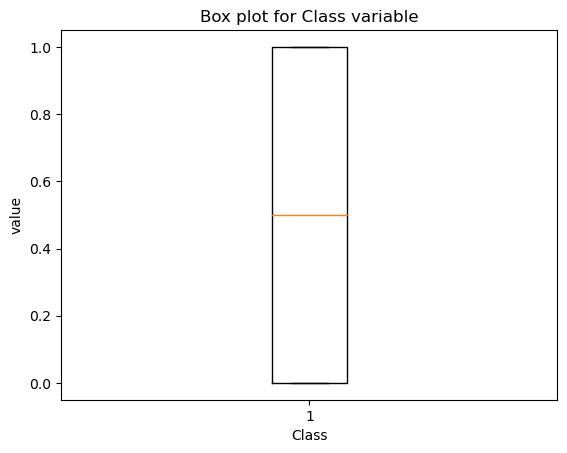

In [ ]:
# Box Plot
for column in df:
    plt.boxplot(df[column])
    plt.xlabel(f"{column}")
    plt.ylabel("value")
    plt.title(f"Box plot for {column} variable")
    plt.show()

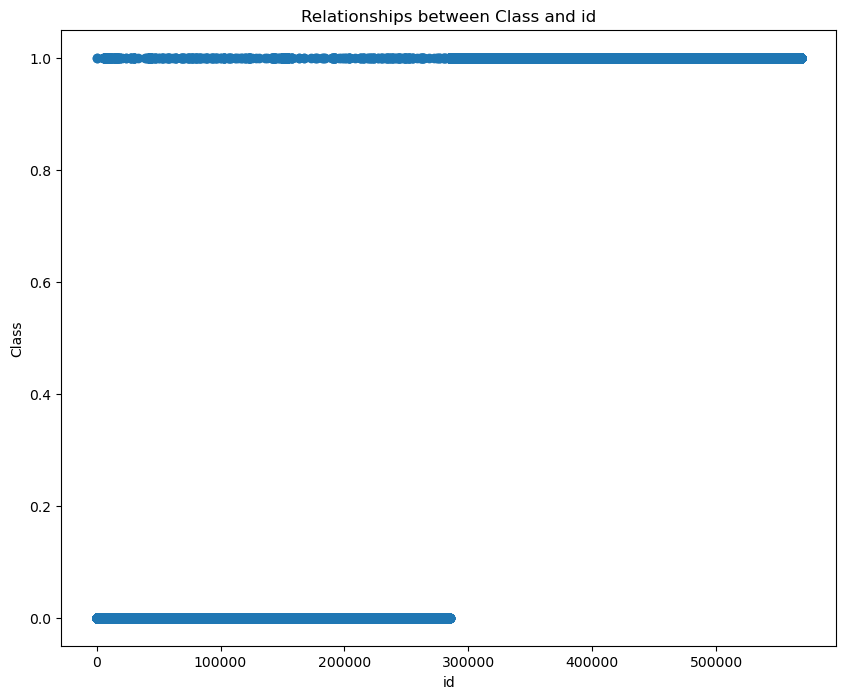

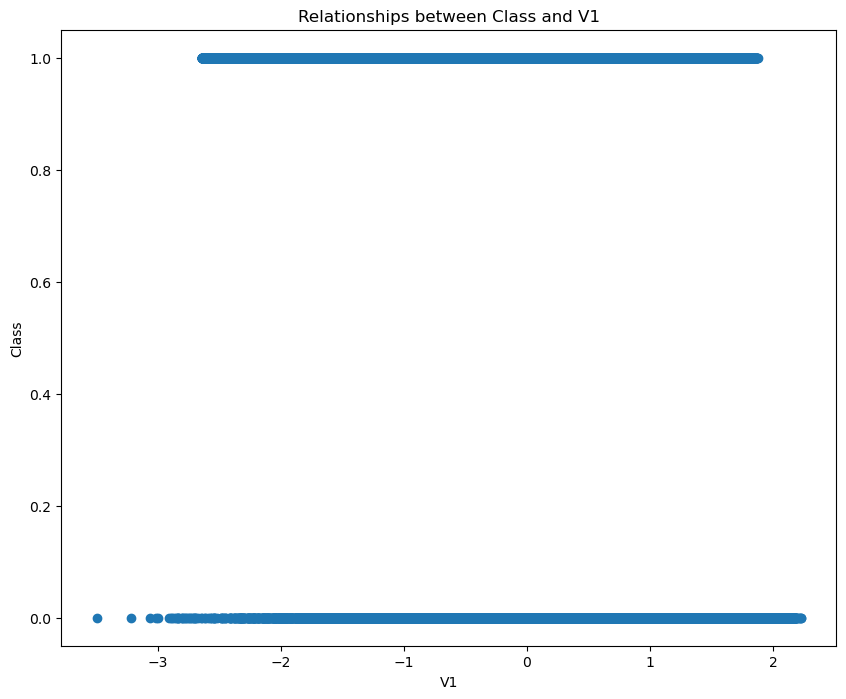

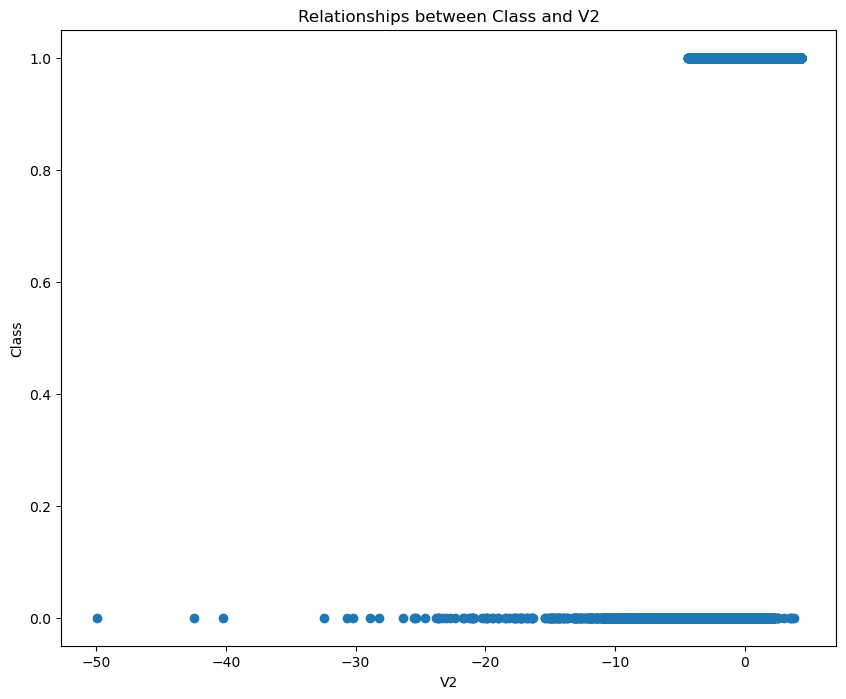

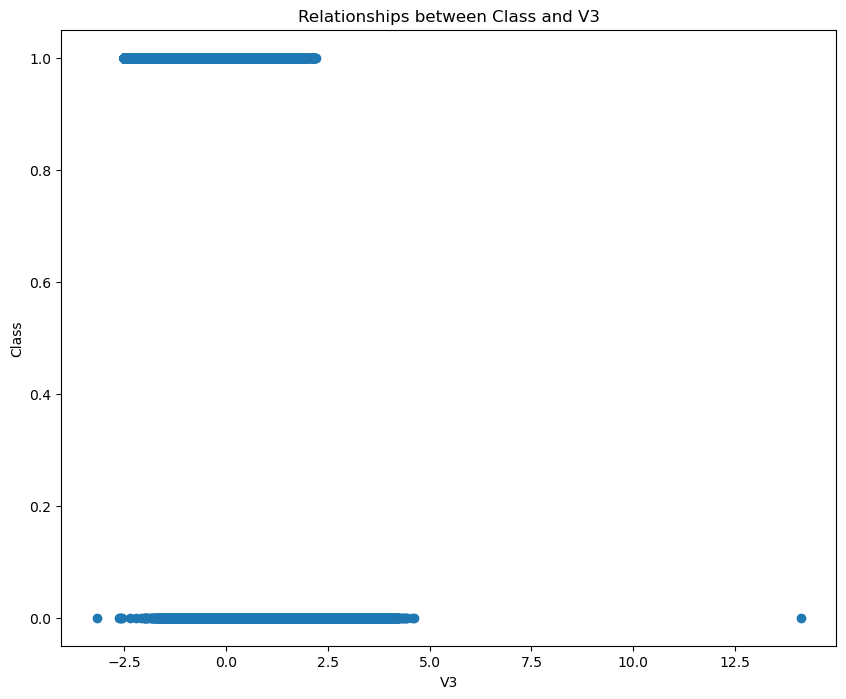

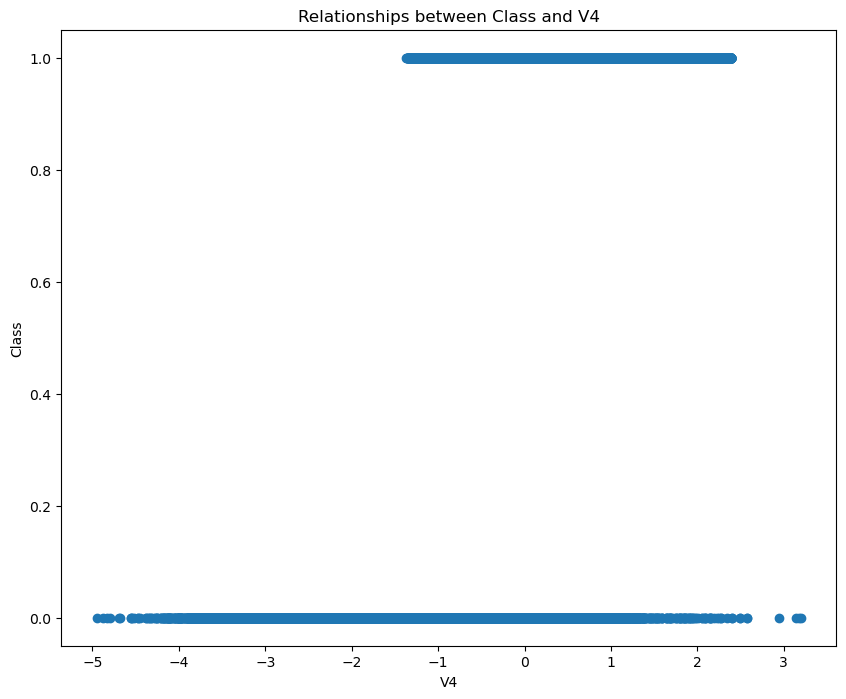

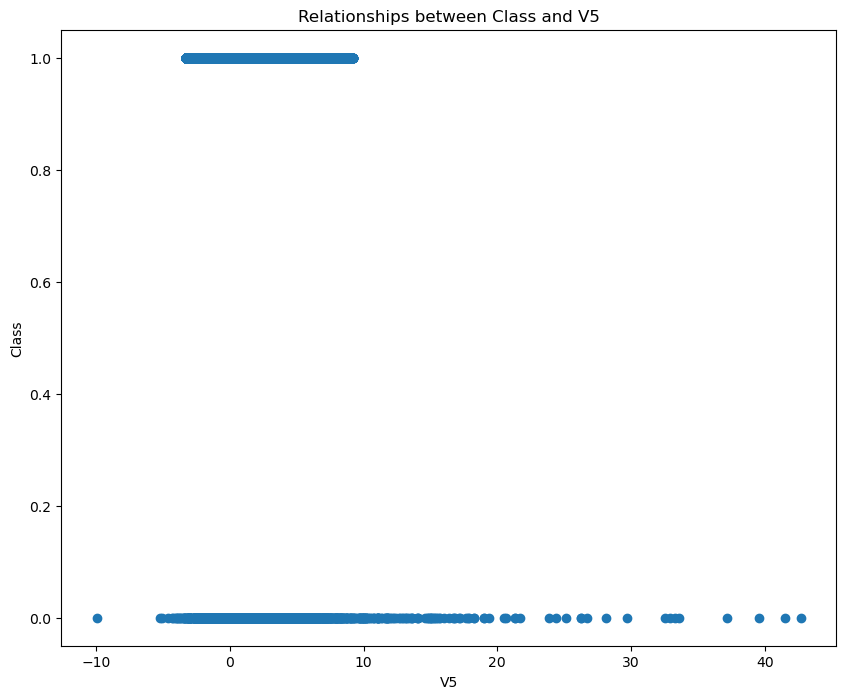

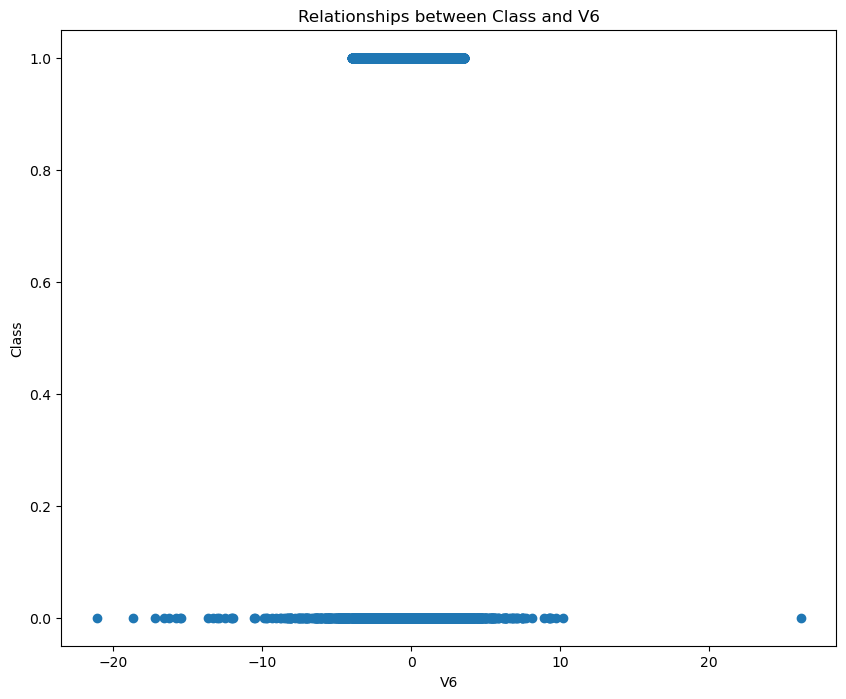

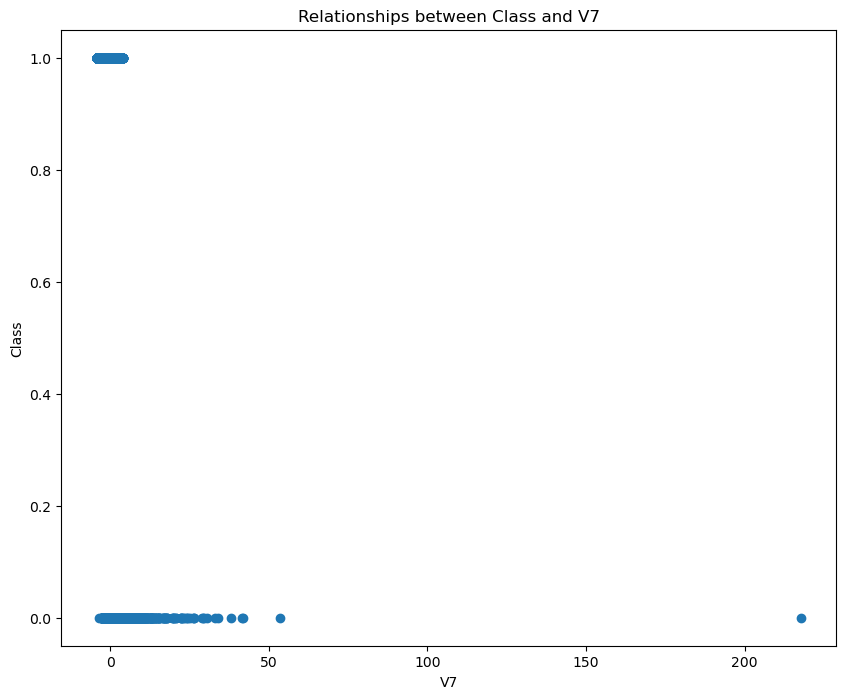

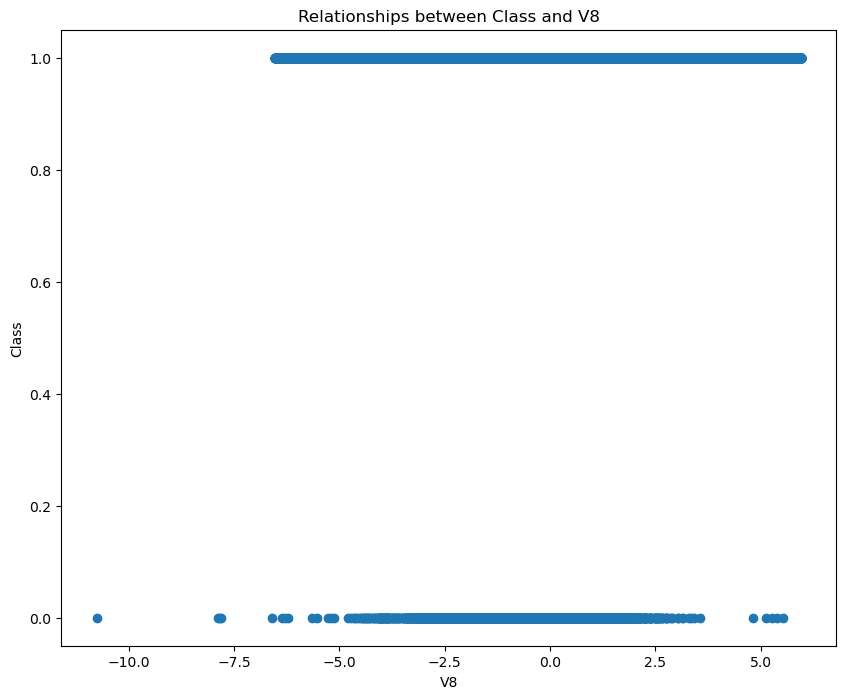

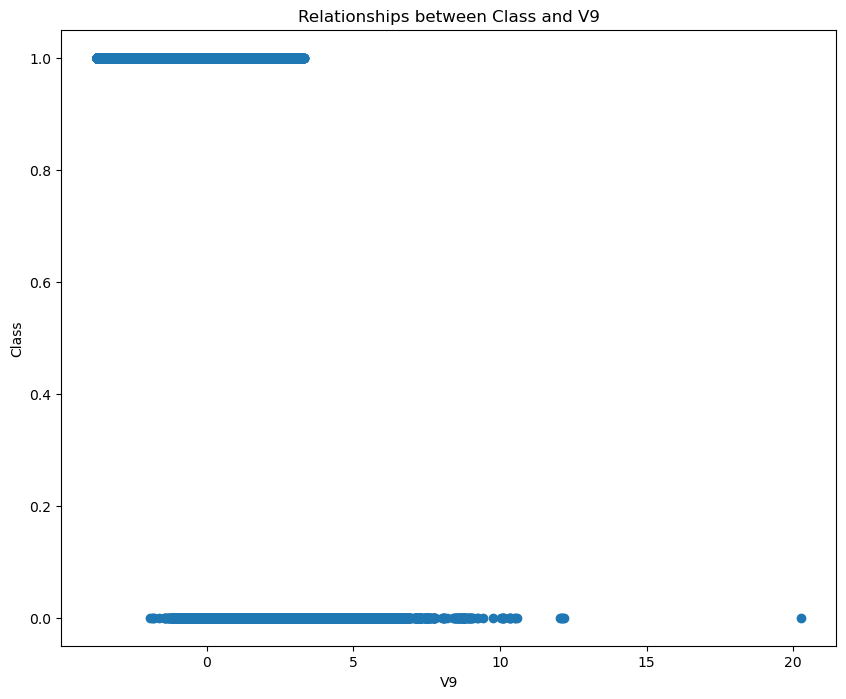

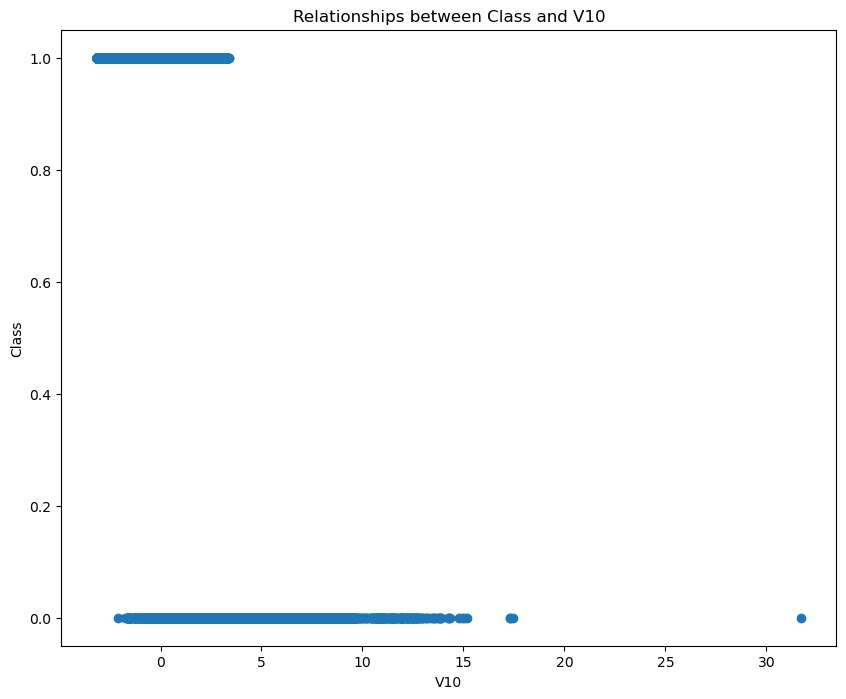

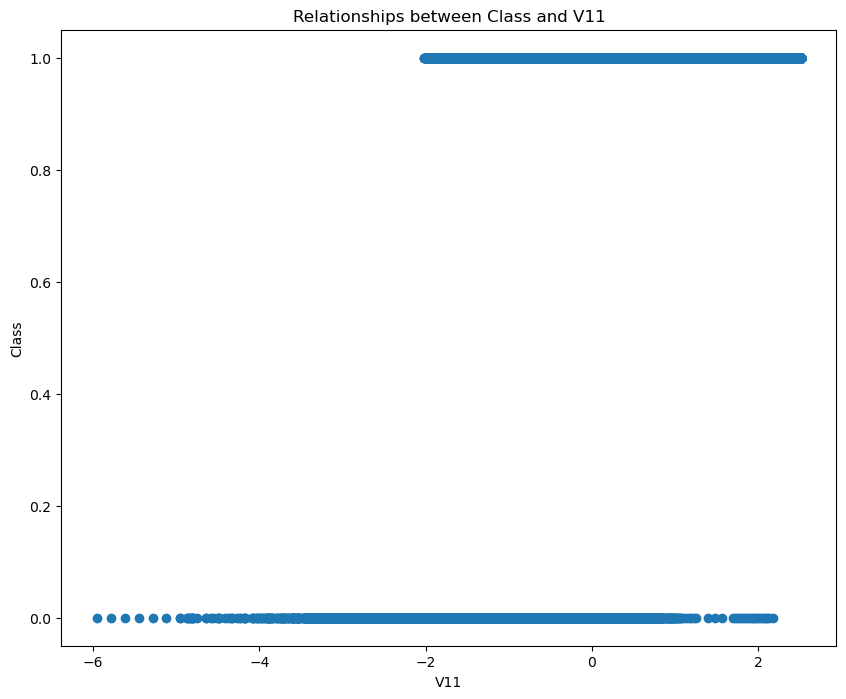

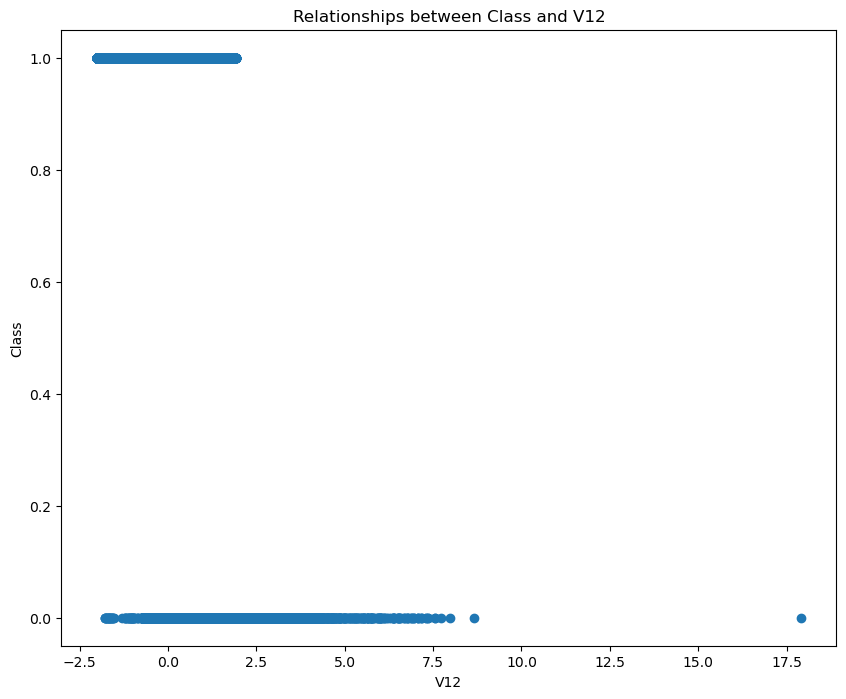

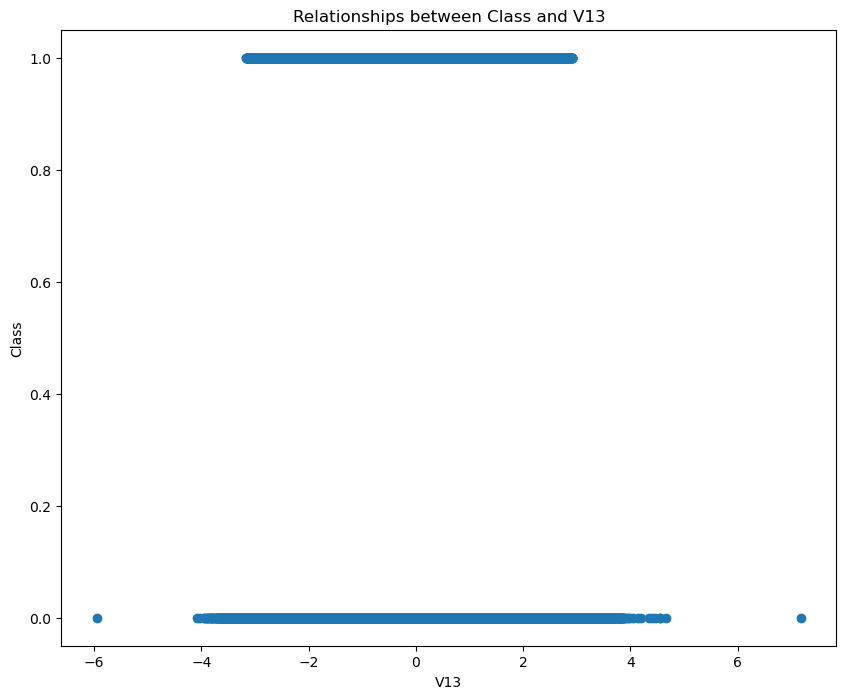

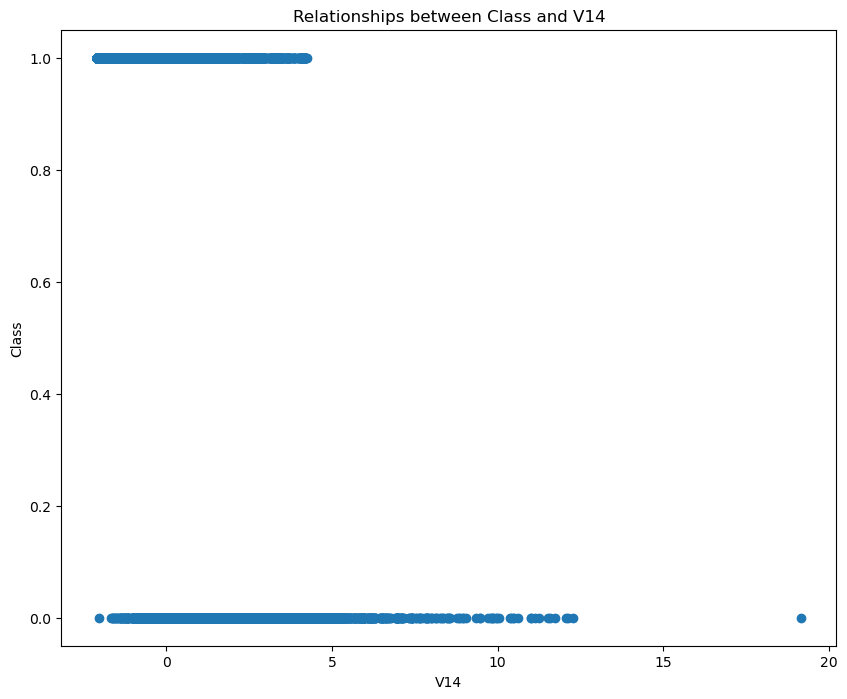

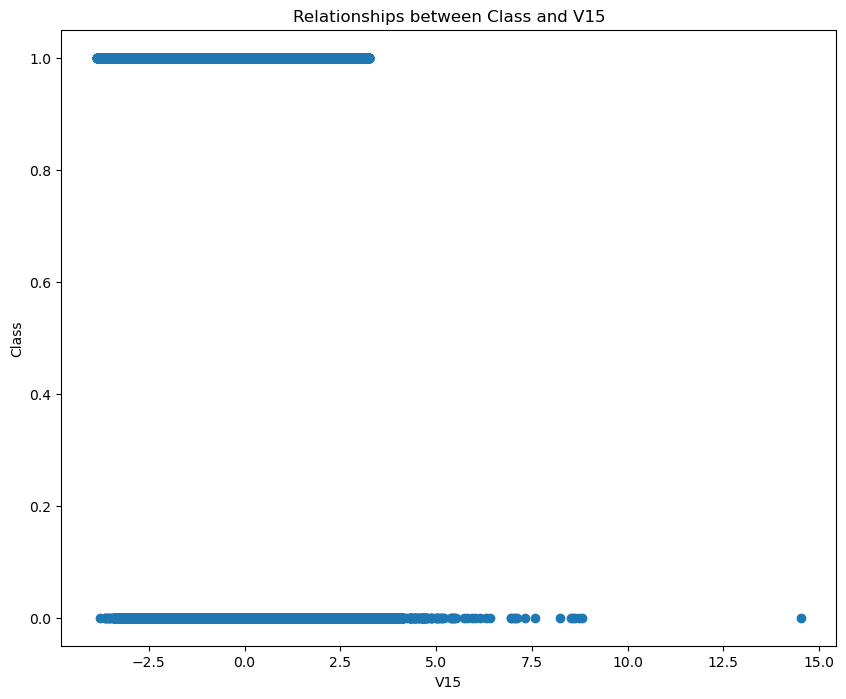

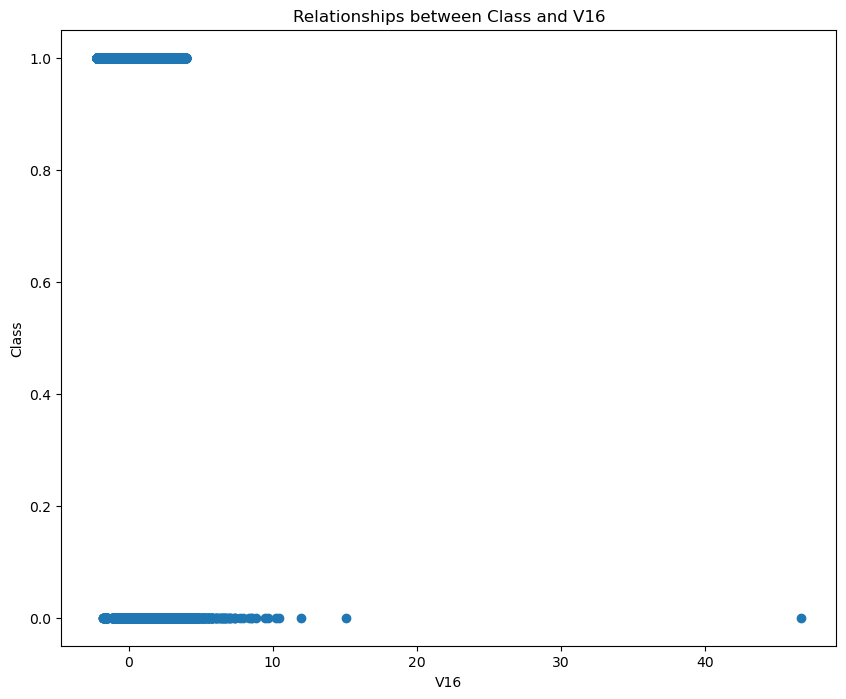

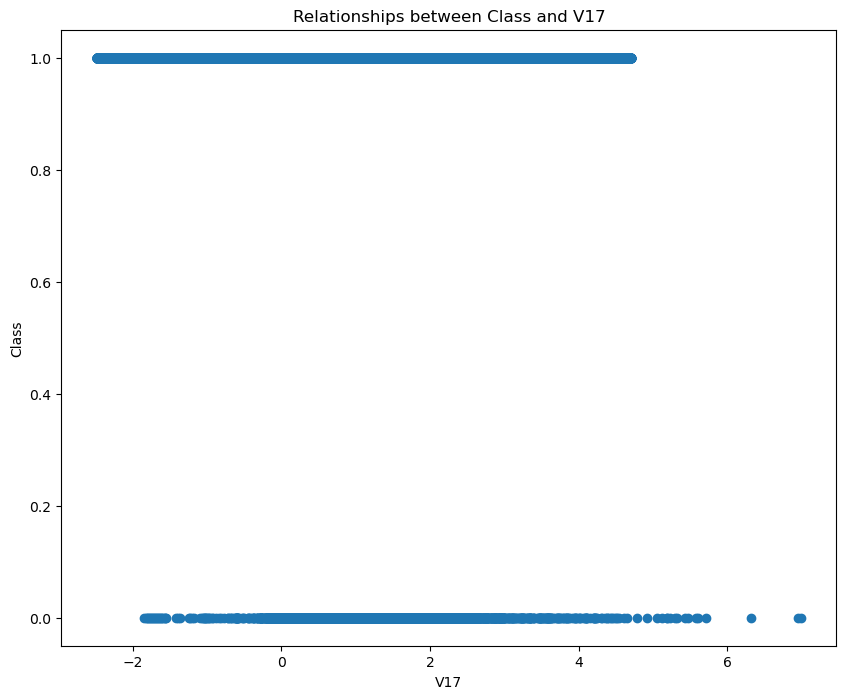

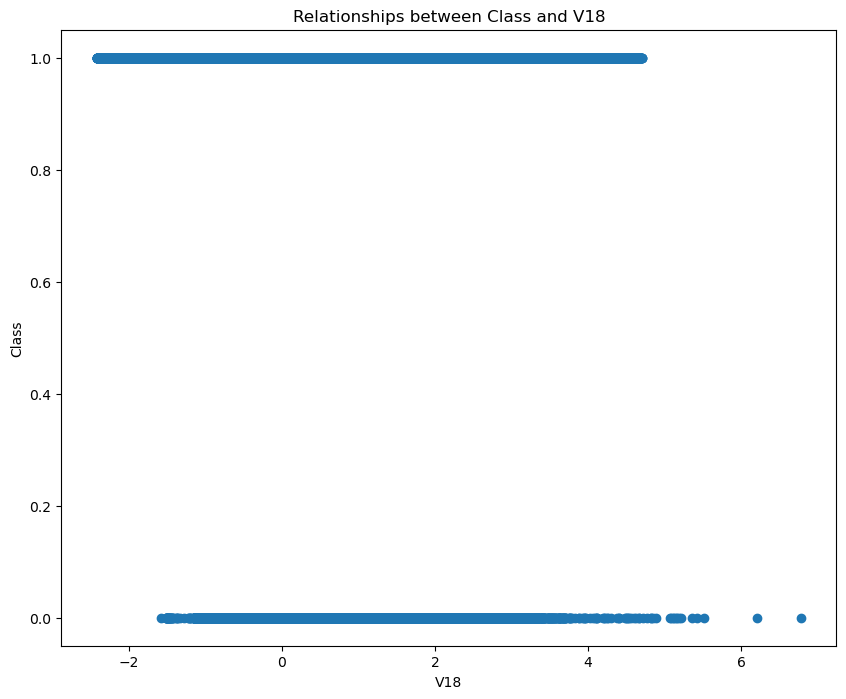

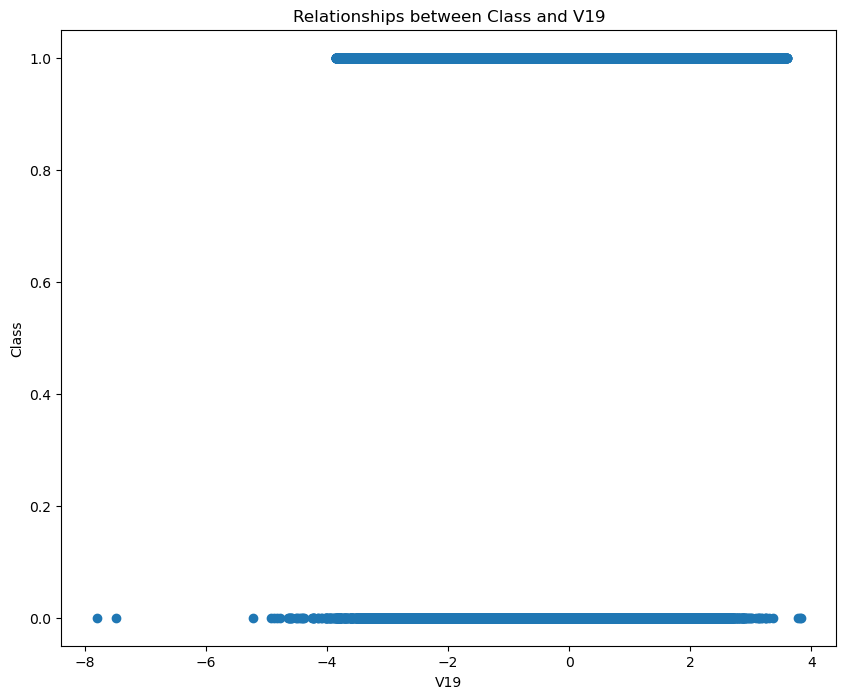

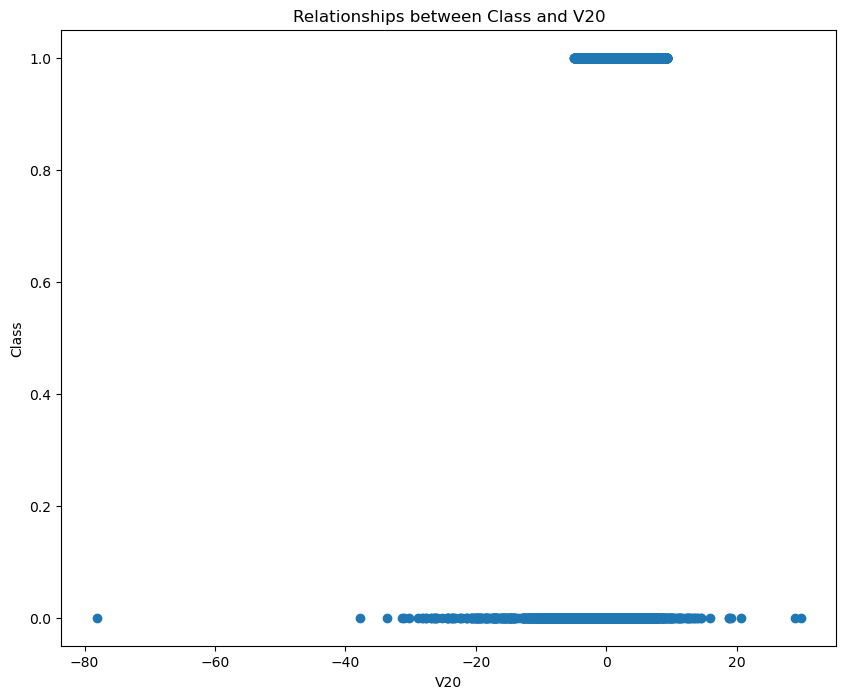

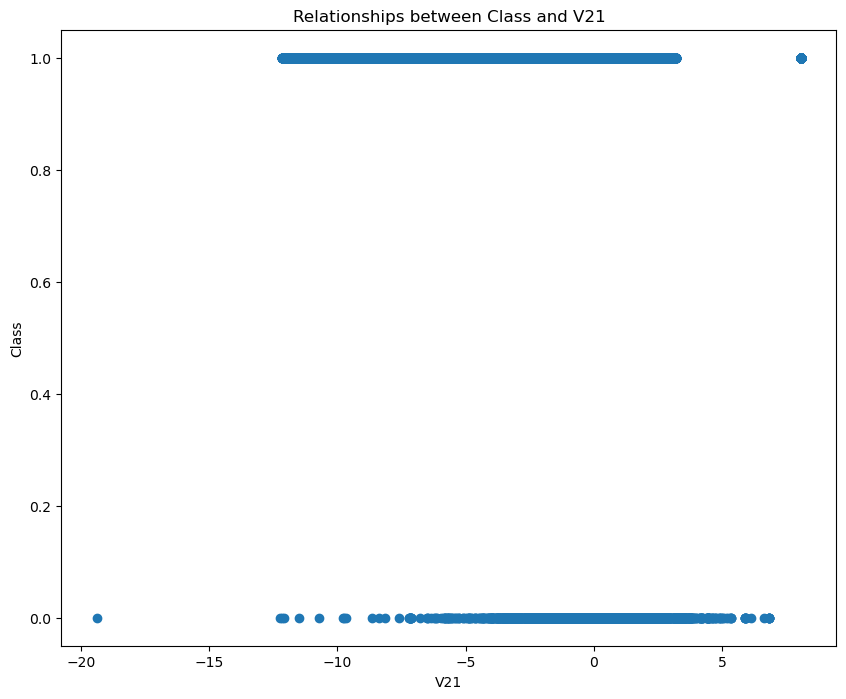

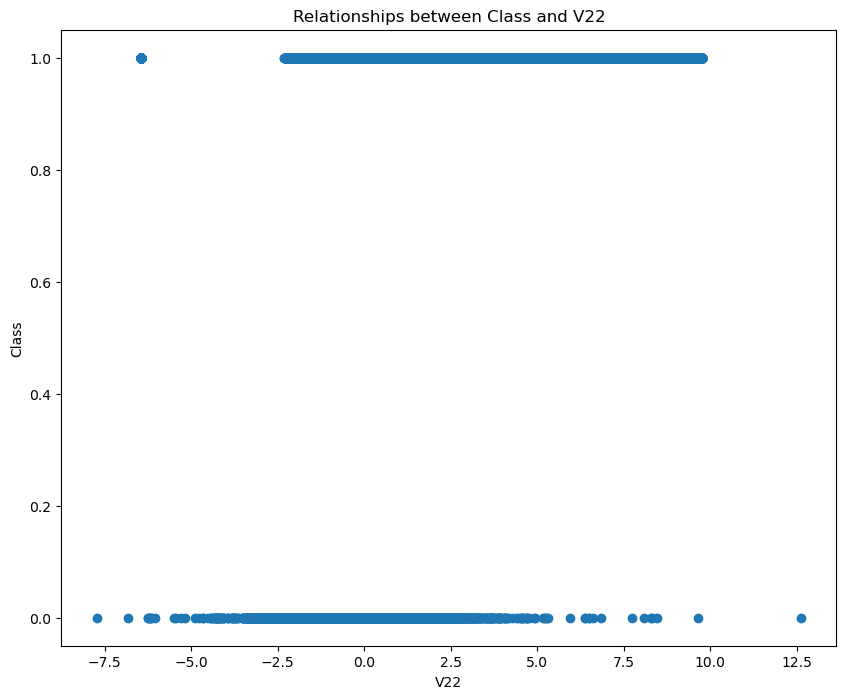

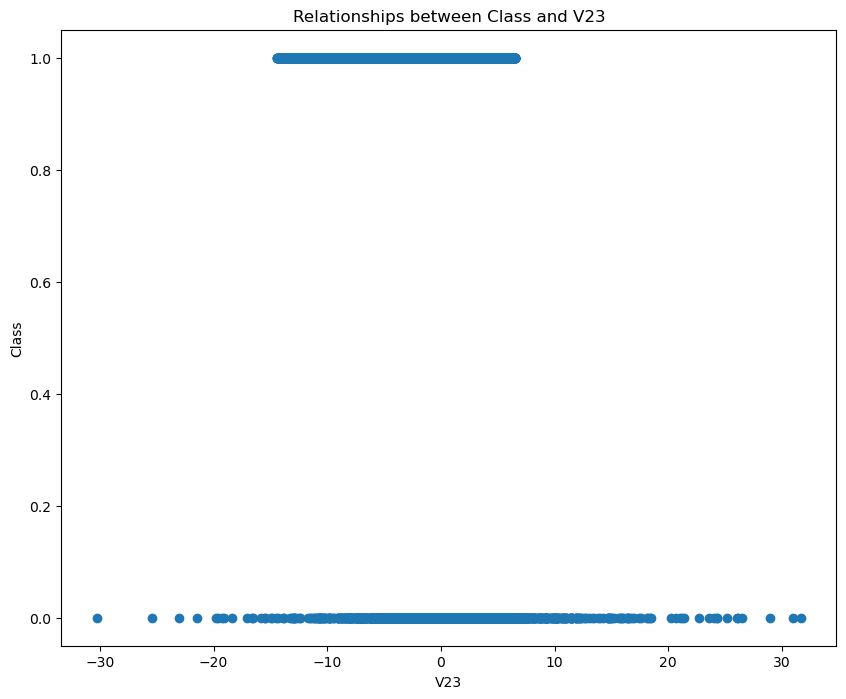

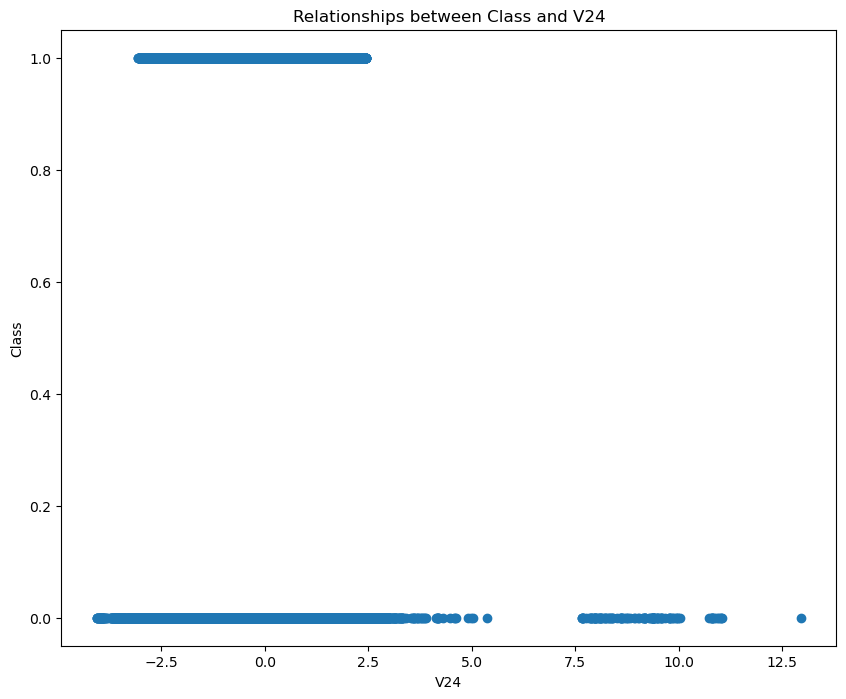

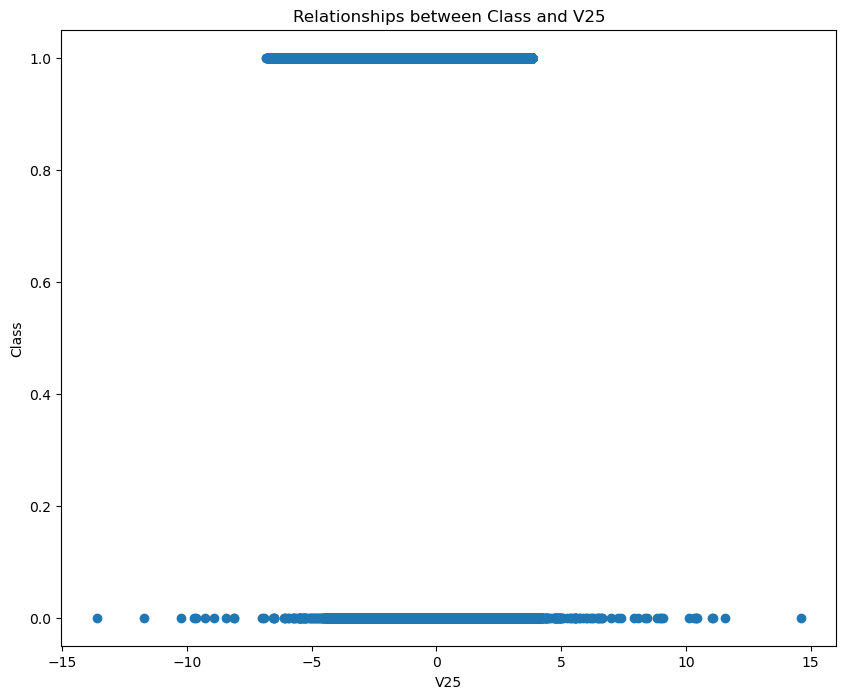

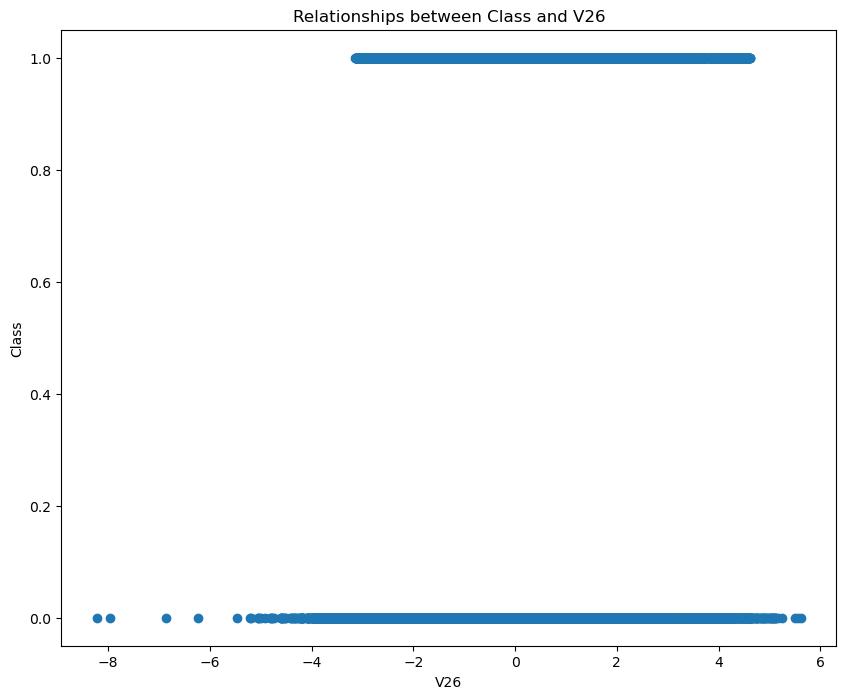

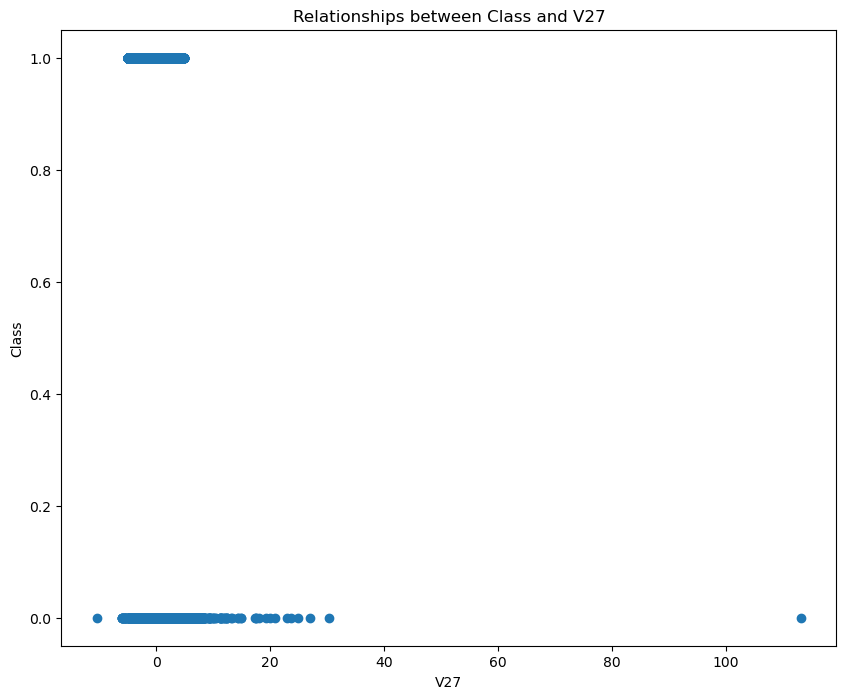

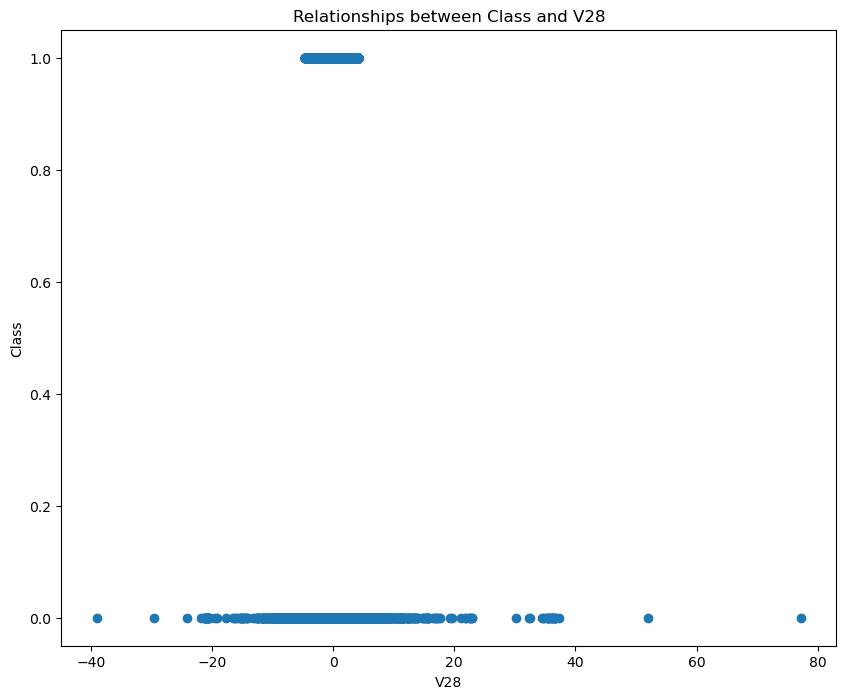

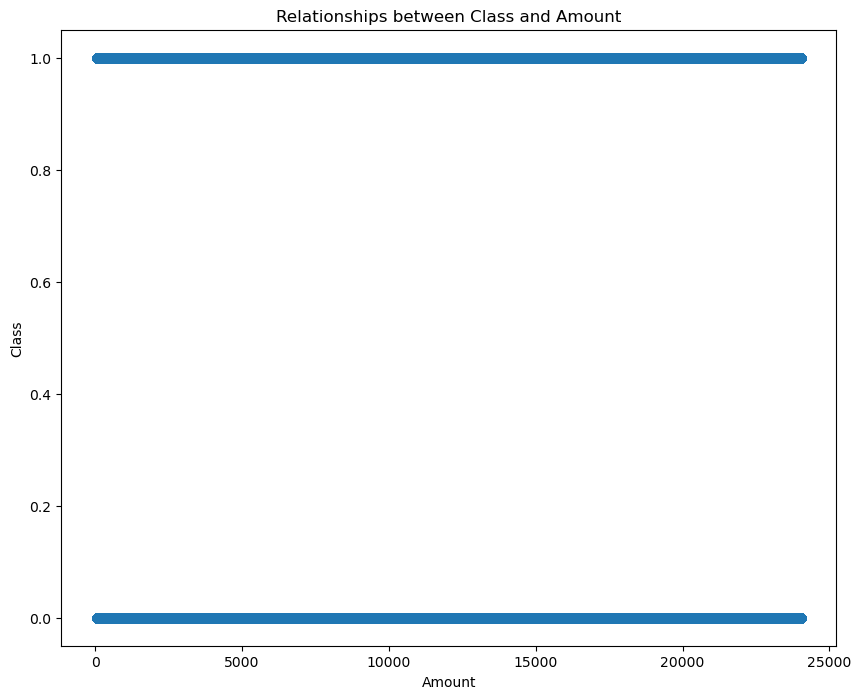

In [ ]:
# Scatter Plot
for column in df.drop("Class", axis = 1):
    plt.figure(figsize = (10, 8))
    plt.scatter(df[column], df["Class"])
    plt.title(f"Relationships between Class and {column}")
    plt.xlabel(f"{column}")
    plt.ylabel("Class")
    plt.show()

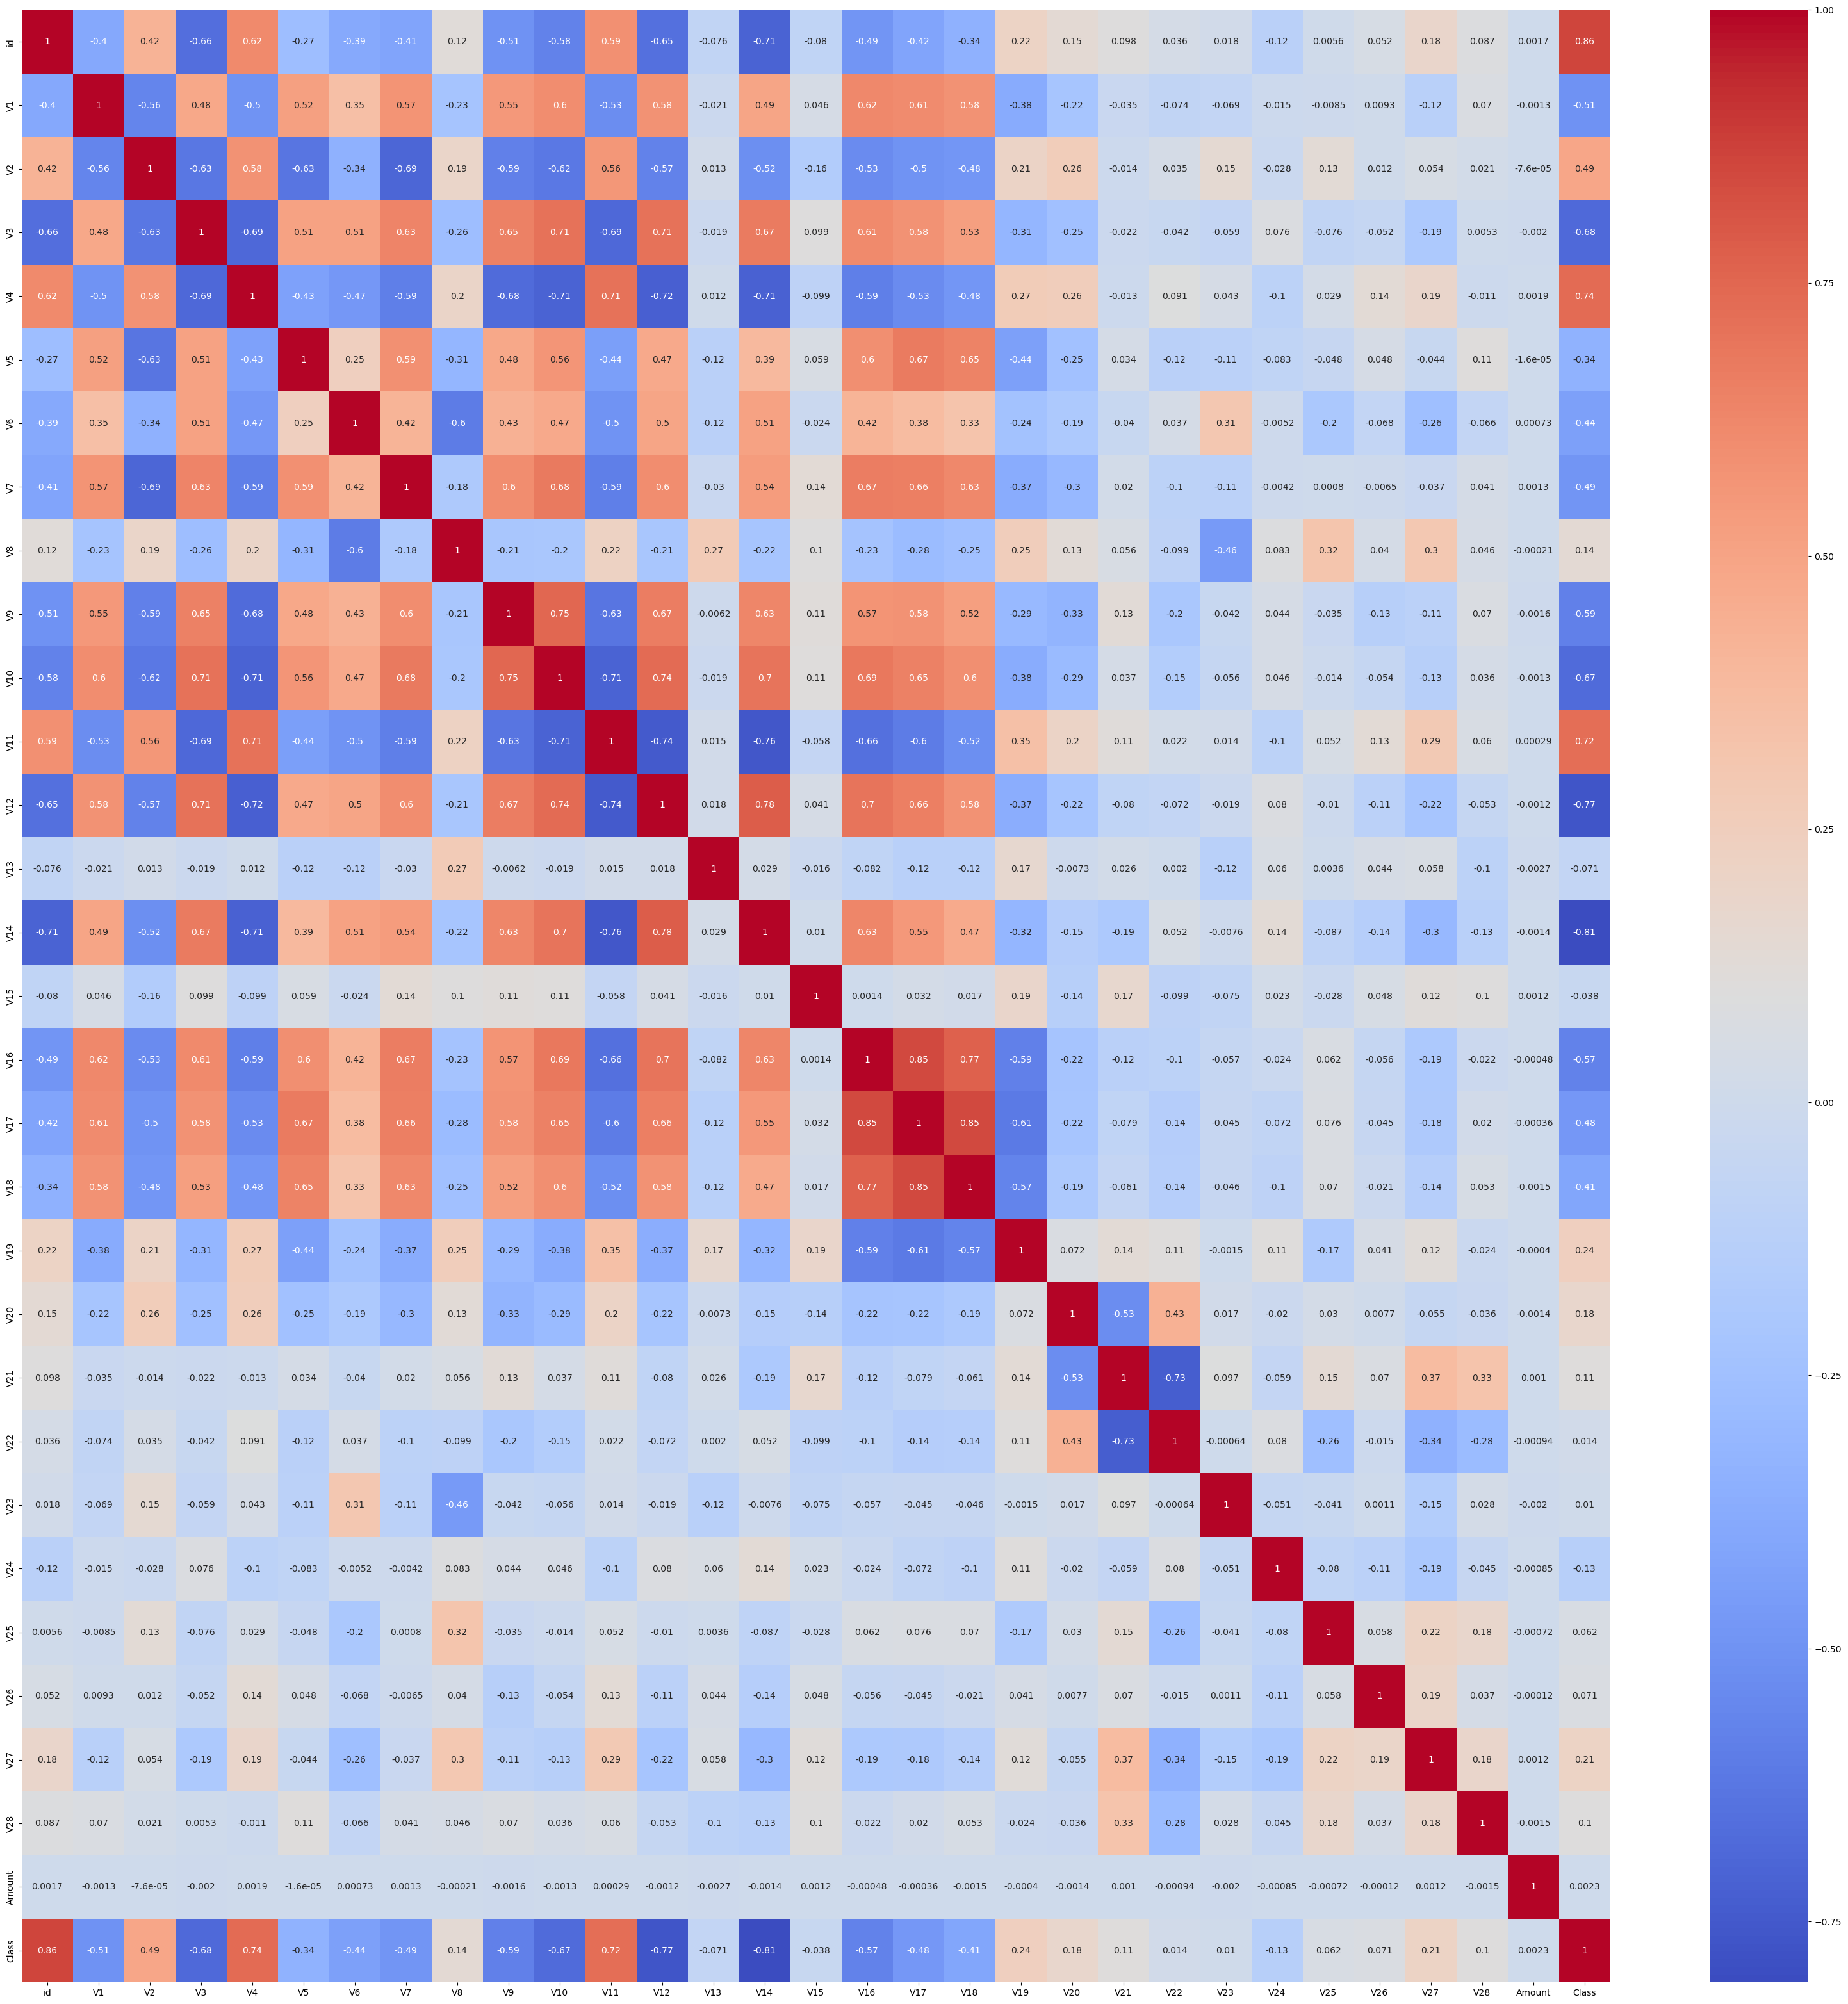

In [ ]:
# Correlation Matrix
plt.figure(figsize=(40, 40))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.show()

## PCA Dimensionality Reduction

In [ ]:
# Standardize the features (important for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(["id", "Class"], axis = 1))

# Initialize PCA
pca = PCA(n_components='mle')

# Fit PCA on the scaled data and transform it
pca_result = pca.fit(df_scaled)

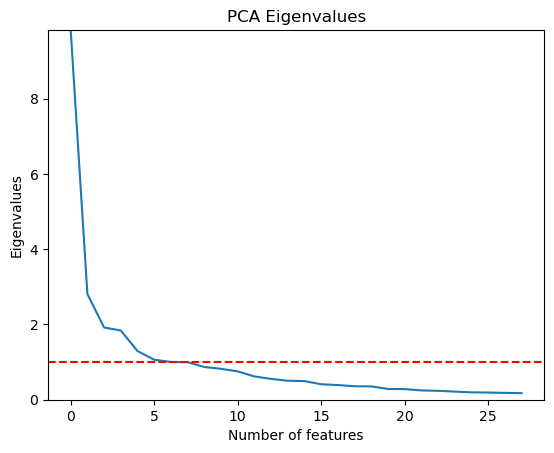

In [ ]:
# Elbow Curve plot to find the number of features that eigenvalue is 1
plt.plot(pca_result.explained_variance_)
plt.xlabel("Number of features")
plt.ylabel("Eigenvalues")
plt.title("PCA Eigenvalues")
plt.ylim(0, max(pca_result.explained_variance_))
plt.style.context("seaborn-whitegrid")
plt.axhline(y = 1, color = "r", linestyle = "--")
plt.show()

In [ ]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(["id", "Class"], axis = 1))

# Initialize PCA (Since the max number of features with eigenvalue 1 is "7", set parameter n_components as 7)
pca = PCA(n_components=7)

# Fit PCA on the scaled data and transform it
pca_result = pca.fit_transform(df_scaled)

# The result is an array of the principal components. To put this back into a DataFrame:
pca_features = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
pca_target = df["Class"]
pca_dataframe = pd.concat([pca_features, pca_target], axis = 1)

In [ ]:
pca_dataframe

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Class
0,2.190569,-0.164134,0.262074,0.910706,0.493348,-1.348655,-0.115885,0
1,2.085246,0.354991,0.169270,0.020113,0.121525,0.636333,-0.881340,0
2,2.283197,-0.522163,-0.359446,0.381551,1.141498,-0.140108,-1.815873,0
3,2.694945,0.107275,-0.257885,-1.140970,-0.686466,1.155420,-0.806764,0
4,2.048884,-0.354309,0.935546,0.978225,0.598423,0.900631,-0.787762,0
...,...,...,...,...,...,...,...,...
568625,-4.169072,1.382833,-1.496858,0.747855,1.317950,-0.161226,-1.479027,1
568626,-0.744048,0.385634,-0.381158,0.565018,1.286491,0.106821,-1.620578,1
568627,-0.698403,-0.319739,-0.268754,-0.138759,-0.226031,-0.514659,1.279002,1
568628,1.358058,0.230194,0.270352,-0.505472,-0.068250,-0.613608,0.314808,1


## Modelling

### Splitting the data into features and target variable

In [ ]:
# Features and the Target variable with original, non-reduced data
X = df.drop(["id", "Class"], axis = 1)
y = df["Class"]

# Features and the Target variable with reduced data
X_reduced = pca_dataframe.drop("Class", axis = 1)
y_reduced = pca_dataframe["Class"]

In [ ]:
# The Train set and the Test set with original, non-reduced data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# The Train set and the Test set with reduced data
X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(X_reduced, y_reduced, test_size = 0.2, random_state = 42)

# Feature scaling to bring all features to the same scale
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Base Model

#### Logistic Regression

##### Logistic Regression with original data sets

In [ ]:
# Initializing the Logistic Regression model
LR = LogisticRegression(max_iter = 10000)

# Fitting the model with training data
LR.fit(X_train, y_train)

# Making predictions on the test data
lr_train_preds = LR.predict(X_train)
lr_test_preds = LR.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    227565
           1       0.98      0.95      0.96    227339

    accuracy                           0.96    454904
   macro avg       0.97      0.96      0.96    454904
weighted avg       0.97      0.96      0.96    454904

 ROC-AUC Score: 0.9649
 Accuracy Score: 0.9649
 Recall Score: 0.9515
 Precision Score: 0.9777
 F1-score: 0.9644


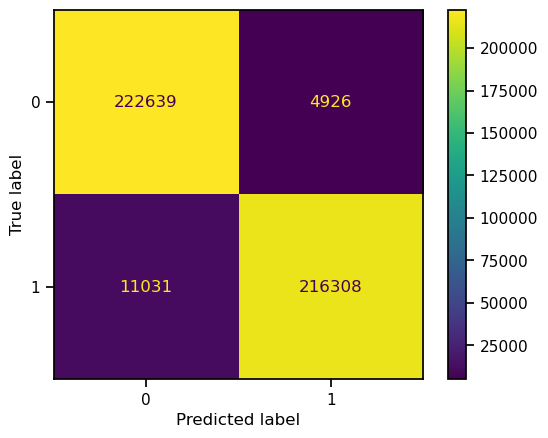

In [ ]:
# Evaluate the Train set
print(classification_report(y_train, lr_train_preds))
lr_cm_train = confusion_matrix(y_train, lr_train_preds)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = lr_cm_train, display_labels = LR.classes_).plot()

# Evaluation Scores
roc_auc = round(roc_auc_score(y_train, lr_train_preds), 4)
accuracy = round(accuracy_score(y_train, lr_train_preds), 4)
recall = round(recall_score(y_train, lr_train_preds), 4)
precision = round(precision_score(y_train, lr_train_preds), 4)
f_one = round(f1_score(y_train, lr_train_preds), 4)

# Return evaluation scores
print(f"=========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"=========================")

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56750
           1       0.98      0.95      0.96     56976

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

 ROC-AUC Score: 0.9653
 Accuracy Score: 0.9653
 Recall Score: 0.9528
 Precision Score: 0.9773
 F1-score: 0.9649


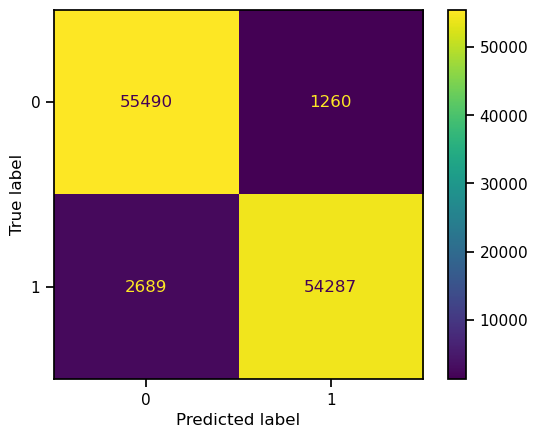

In [ ]:
# Evaluate the Test set
print(classification_report(y_test, lr_test_preds))
lr_cm_test = confusion_matrix(y_test, lr_test_preds)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = lr_cm_test, display_labels = LR.classes_).plot()

# Evaluation Scores
roc_auc = round(roc_auc_score(y_test, lr_test_preds), 4)
accuracy = round(accuracy_score(y_test, lr_test_preds), 4)
recall = round(recall_score(y_test, lr_test_preds), 4)
precision = round(precision_score(y_test, lr_test_preds), 4)
f_one = round(f1_score(y_test, lr_test_preds), 4)

# Return evaluation scores
print(f"========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"========================")

##### Logistic Regression with reduced data sets

In [ ]:
# Initializing the Logistic Regression model
LR_reduced = LogisticRegression(max_iter = 10000)

# Fitting the model with training data
LR_reduced.fit(X_reduced_train, y_reduced_train)

# Making predictions on the test data
lr_reduced_train_preds = LR_reduced.predict(X_reduced_train)
lr_reduced_test_preds = LR_reduced.predict(X_reduced_test)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95    227565
           1       0.98      0.92      0.95    227339

    accuracy                           0.95    454904
   macro avg       0.95      0.95      0.95    454904
weighted avg       0.95      0.95      0.95    454904

 ROC-AUC Score: 0.9495
 Accuracy Score: 0.9495
 Recall Score: 0.9201
 Precision Score: 0.9776
 F1-score: 0.9479


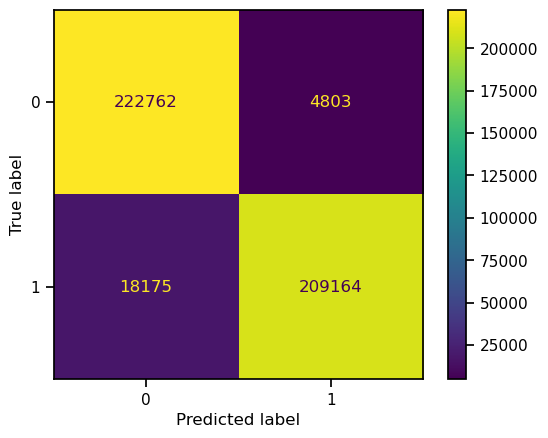

In [ ]:
# Evaluate the Train set
print(classification_report(y_reduced_train, lr_reduced_train_preds))
lr_reduced_cm_train = confusion_matrix(y_reduced_train, lr_reduced_train_preds)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = lr_reduced_cm_train, display_labels = LR_reduced.classes_).plot()

# Evaluation Scores
roc_auc = round(roc_auc_score(y_reduced_train, lr_reduced_train_preds), 4)
accuracy = round(accuracy_score(y_reduced_train, lr_reduced_train_preds), 4)
recall = round(recall_score(y_reduced_train, lr_reduced_train_preds), 4)
precision = round(precision_score(y_reduced_train, lr_reduced_train_preds), 4)
f_one = round(f1_score(y_reduced_train, lr_reduced_train_preds), 4)

# Return evaluation scores
print(f"========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"========================")

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.98      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

 ROC-AUC Score: 0.9501
 Accuracy Score: 0.9501
 Recall Score: 0.9213
 Precision Score: 0.9777
 F1-score: 0.9487


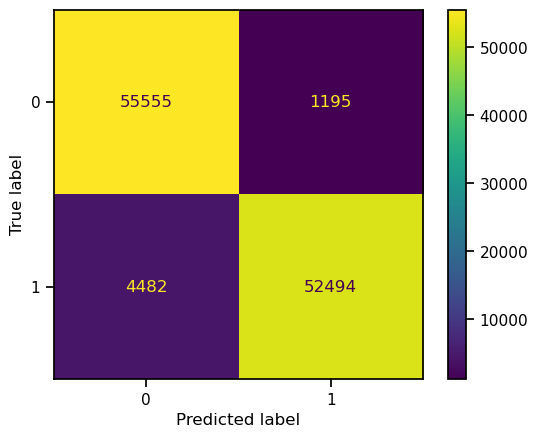

In [ ]:
# Evaluate the Test set
print(classification_report(y_reduced_test, lr_reduced_test_preds))
lr_reduced_cm_test = confusion_matrix(y_reduced_test, lr_reduced_test_preds)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = lr_reduced_cm_test, display_labels = LR_reduced.classes_).plot()

# Evaluation Scores
roc_auc = round(roc_auc_score(y_reduced_test, lr_reduced_test_preds), 4)
accuracy = round(accuracy_score(y_reduced_test, lr_reduced_test_preds), 4)
recall = round(recall_score(y_reduced_test, lr_reduced_test_preds), 4)
precision = round(precision_score(y_reduced_test, lr_reduced_test_preds), 4)
f_one = round(f1_score(y_reduced_test, lr_reduced_test_preds), 4)

# Return evaluation scores
print(f"========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"========================")

##### LR Result

**Logistic Regression with original data sets** was outperformed than the other one with original data sets.

#### Decision Tree

##### Decision Tree with original data sets

In [ ]:
# Initializing the Decision Tree model
DT = DecisionTreeClassifier()

# Fitting the model with training data
DT.fit(X_train, y_train)

# Making predictions on the test data
dt_train_preds = DT.predict(X_train)
dt_test_preds = DT.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227565
           1       1.00      1.00      1.00    227339

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904

 ROC-AUC Score: 1.0
 Accuracy Score: 1.0
 Recall Score: 1.0
 Precision Score: 1.0
 F1-score: 1.0


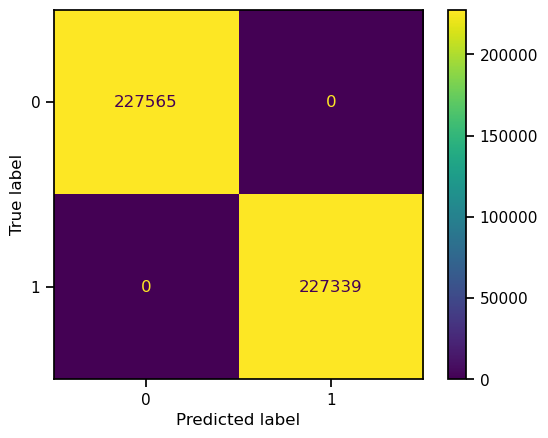

In [ ]:
# Evaluate the Train set
print(classification_report(y_train, dt_train_preds))
dt_cm_train = confusion_matrix(y_train, dt_train_preds)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = dt_cm_train, display_labels = DT.classes_).plot()

# Evaluation Scores
roc_auc = round(roc_auc_score(y_train, dt_train_preds), 4)
accuracy = round(accuracy_score(y_train, dt_train_preds), 4)
recall = round(recall_score(y_train, dt_train_preds), 4)
precision = round(precision_score(y_train, dt_train_preds), 4)
f_one = round(f1_score(y_train, dt_train_preds), 4)

# Return evaluation scores
print(f"=========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"=========================")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

 ROC-AUC Score: 0.9981
 Accuracy Score: 0.9981
 Recall Score: 0.999
 Precision Score: 0.9972
 F1-score: 0.9981


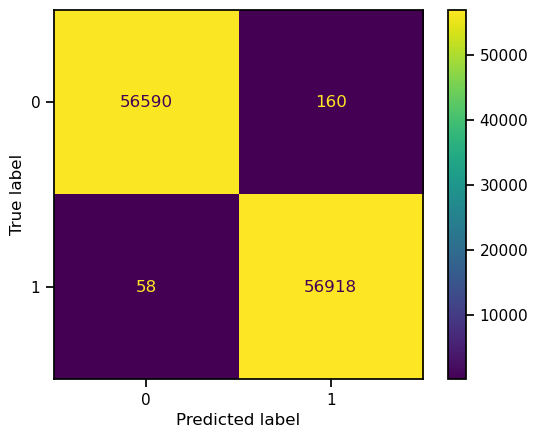

In [ ]:
# Evaluate the Test set
print(classification_report(y_test, dt_test_preds))
dt_cm_test = confusion_matrix(y_test, dt_test_preds)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = dt_cm_test, display_labels = DT.classes_).plot()

# Evaluation Scores
roc_auc = round(roc_auc_score(y_test, dt_test_preds), 4)
accuracy = round(accuracy_score(y_test, dt_test_preds), 4)
recall = round(recall_score(y_test, dt_test_preds), 4)
precision = round(precision_score(y_test, dt_test_preds), 4)
f_one = round(f1_score(y_test, dt_test_preds), 4)

# Return evaluation scores
print(f"========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"========================")

##### Decision Tree with reduced data sets

In [ ]:
# Initializing the Decision Tree model
dt_reduced = DecisionTreeClassifier()

# Fitting the model with training data
dt_reduced.fit(X_reduced_train, y_reduced_train)

# Making predictions on the test data
dt_reduced_train_preds = dt_reduced.predict(X_reduced_train)
dt_reduced_test_preds = dt_reduced.predict(X_reduced_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227565
           1       1.00      1.00      1.00    227339

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904

 ROC-AUC Score: 1.0
 Accuracy Score: 1.0
 Recall Score: 1.0
 Precision Score: 1.0
 F1-score: 1.0


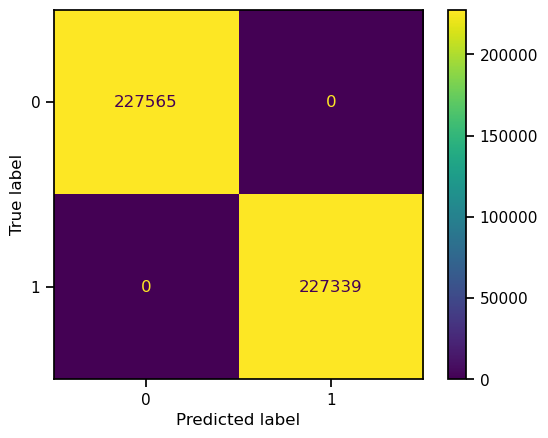

In [ ]:
# Evaluate the Train set
print(classification_report(y_reduced_train, dt_reduced_train_preds))
dt_reduced_cm_train = confusion_matrix(y_reduced_train, dt_reduced_train_preds)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = dt_reduced_cm_train, display_labels = dt_reduced.classes_).plot()

# Evaluation Scores
roc_auc = round(roc_auc_score(y_reduced_train, dt_reduced_train_preds), 4)
accuracy = round(accuracy_score(y_reduced_train, dt_reduced_train_preds), 4)
recall = round(recall_score(y_reduced_train, dt_reduced_train_preds), 4)
precision = round(precision_score(y_reduced_train, dt_reduced_train_preds), 4)
f_one = round(f1_score(y_reduced_train, dt_reduced_train_preds), 4)

# Return evaluation scores
print(f"========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"========================")

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56750
           1       0.99      0.99      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726

 ROC-AUC Score: 0.9926
 Accuracy Score: 0.9926
 Recall Score: 0.9939
 Precision Score: 0.9914
 F1-score: 0.9926


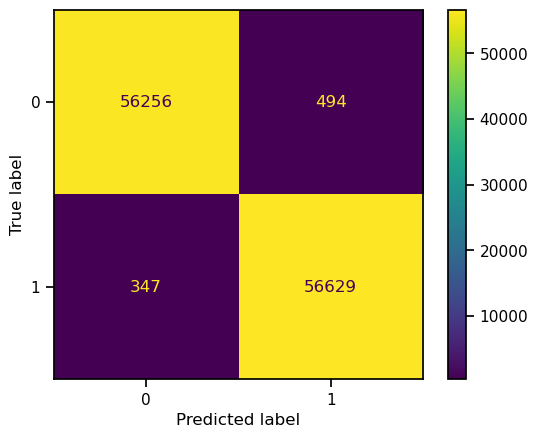

In [ ]:
# Evaluate the Test set
print(classification_report(y_reduced_test, dt_reduced_test_preds))
dt_reduced_cm_test = confusion_matrix(y_reduced_test, dt_reduced_test_preds)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = dt_reduced_cm_test, display_labels = dt_reduced.classes_).plot()

# Evaluation Scores
roc_auc = round(roc_auc_score(y_reduced_test, dt_reduced_test_preds), 4)
accuracy = round(accuracy_score(y_reduced_test, dt_reduced_test_preds), 4)
recall = round(recall_score(y_reduced_test, dt_reduced_test_preds), 4)
precision = round(precision_score(y_reduced_test, dt_reduced_test_preds), 4)
f_one = round(f1_score(y_reduced_test, dt_reduced_test_preds), 4)

# Return evaluation scores
print(f"========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"========================")

##### DT Result

**Decision Tree with original data sets** was outperformed than the other one with PCA-reduced data sets.

#### K-Nearest Neighbors (KNN)

##### KNN with original data sets

In [ ]:
# Create an instance of KNeighborsClassifier()
KNC = KNeighborsClassifier()

# Fitting the model with training data
KNC.fit(X_train, y_train)

# Predict the train and test set
knc_train_preds = KNC.predict(X_train)
knc_test_preds = KNC.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227565
           1       1.00      1.00      1.00    227339

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904

 ROC-AUC Score: 0.9986
 Accuracy Score: 0.9986
 Recall Score: 1.0
 Precision Score: 0.9973
 F1-score: 0.9986


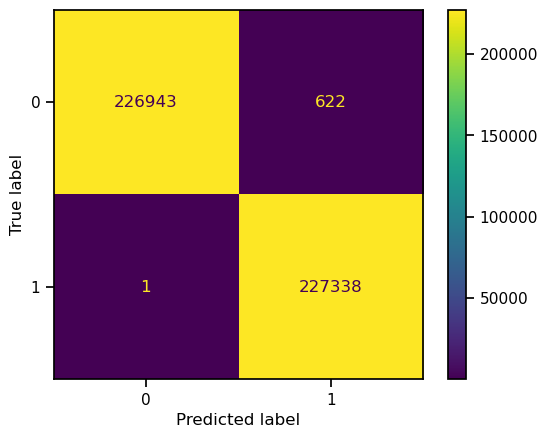

In [ ]:
# Evaluate the Train set
print(classification_report(y_train, knc_train_preds))
knc_cm_train = confusion_matrix(y_train, knc_train_preds)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = knc_cm_train, display_labels = KNC.classes_).plot()

# Evaluation Scores
roc_auc = round(roc_auc_score(y_train, knc_train_preds), 4)
accuracy = round(accuracy_score(y_train, knc_train_preds), 4)
recall = round(recall_score(y_train, knc_train_preds), 4)
precision = round(precision_score(y_train, knc_train_preds), 4)
f_one = round(f1_score(y_train, knc_train_preds), 4)

# Return evaluation scores
print(f"=========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"=========================")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

 ROC-AUC Score: 0.9978
 Accuracy Score: 0.9978
 Recall Score: 1.0
 Precision Score: 0.9957
 F1-score: 0.9978


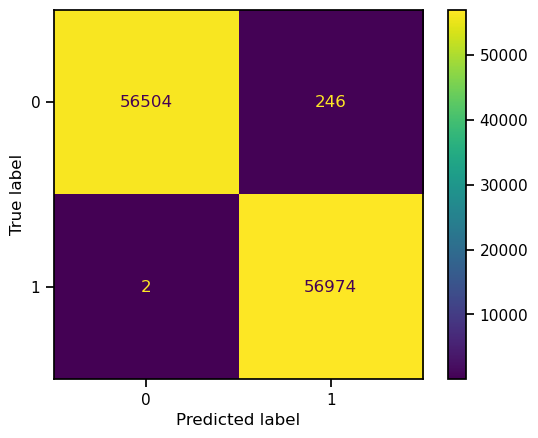

In [ ]:
# Evaluate the Test set
print(classification_report(y_test, knc_test_preds))
knc_cm_test = confusion_matrix(y_test, knc_test_preds)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = knc_cm_test, display_labels = KNC.classes_).plot()

# Evaluation Scores
roc_auc = round(roc_auc_score(y_test, knc_test_preds), 4)
accuracy = round(accuracy_score(y_test, knc_test_preds), 4)
recall = round(recall_score(y_test, knc_test_preds), 4)
precision = round(precision_score(y_test, knc_test_preds), 4)
f_one = round(f1_score(y_test, knc_test_preds), 4)

# Return evaluation scores
print(f"=========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"=========================")

##### KNN with reduced data sets

In [ ]:
# Create an instance of KNeighborsClassifier()
KNC_reduced = KNeighborsClassifier()

# Fitting the model with training data
KNC_reduced.fit(X_reduced_train, y_reduced_train)

# Predict the train and test set
knc_reduced_train_preds = KNC_reduced.predict(X_reduced_train)
knc_reduced_test_preds = KNC_reduced.predict(X_reduced_test)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    227565
           1       0.99      1.00      0.99    227339

    accuracy                           0.99    454904
   macro avg       0.99      0.99      0.99    454904
weighted avg       0.99      0.99      0.99    454904

 ROC-AUC Score: 0.9921
 Accuracy Score: 0.9921
 Recall Score: 0.9992
 Precision Score: 0.9853
 F1-score: 0.9922


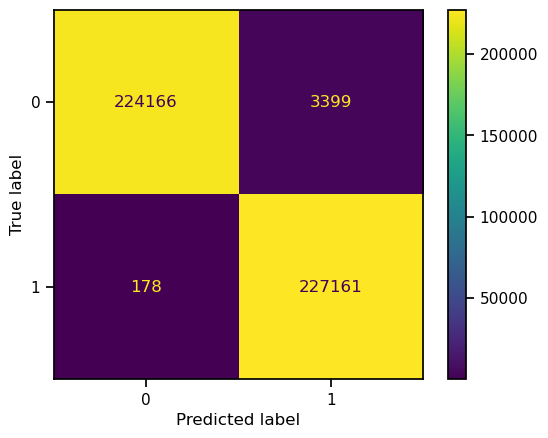

In [ ]:
# Evaluate the Train set
print(classification_report(y_reduced_train, knc_reduced_train_preds))
knc_reduced_cm_train = confusion_matrix(y_reduced_train, knc_reduced_train_preds)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = knc_reduced_cm_train, display_labels = KNC_reduced.classes_).plot()

# Evaluation Scores
roc_auc = round(roc_auc_score(y_reduced_train, knc_reduced_train_preds), 4)
accuracy = round(accuracy_score(y_reduced_train, knc_reduced_train_preds), 4)
recall = round(recall_score(y_reduced_train, knc_reduced_train_preds), 4)
precision = round(precision_score(y_reduced_train, knc_reduced_train_preds), 4)
f_one = round(f1_score(y_reduced_train, knc_reduced_train_preds), 4)

# Return evaluation scores
print(f"=========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"=========================")

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56750
           1       0.98      1.00      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726

 ROC-AUC Score: 0.9886
 Accuracy Score: 0.9886
 Recall Score: 0.9981
 Precision Score: 0.9796
 F1-score: 0.9887


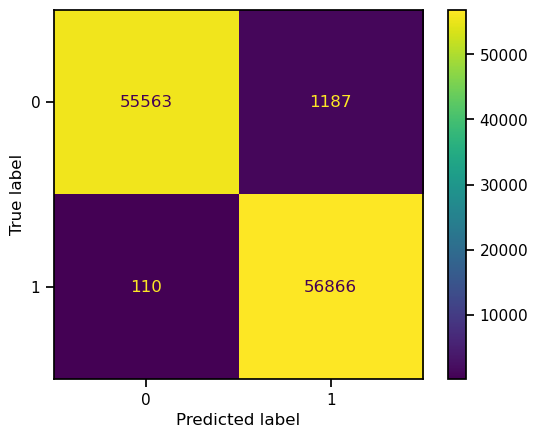

In [ ]:
# Evaluate the Test set
print(classification_report(y_reduced_test, knc_reduced_test_preds))
knc_reduced_cm_test = confusion_matrix(y_reduced_test, knc_reduced_test_preds)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = knc_reduced_cm_test, display_labels = KNC_reduced.classes_).plot()

# Evaluation Scores
roc_auc = round(roc_auc_score(y_reduced_test, knc_reduced_test_preds), 4)
accuracy = round(accuracy_score(y_reduced_test, knc_reduced_test_preds), 4)
recall = round(recall_score(y_reduced_test, knc_reduced_test_preds), 4)
precision = round(precision_score(y_reduced_test, knc_reduced_test_preds), 4)
f_one = round(f1_score(y_reduced_test, knc_reduced_test_preds), 4)

# Return evaluation scores
print(f"=========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"=========================")

##### KNN Result

**K-Nearest Neighbors with original data sets** was outperformed than the other one with original data sets.

### Hyperparameter Tuning

#### Logistic Regression Hyperparameter Tuning

In [ ]:
# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Define multiple scoring metrics
scoring_metrics = {
    "ROC-AUC": make_scorer(roc_auc_score),
    'accuracy': make_scorer(accuracy_score),
    "recall": make_scorer(recall_score),
    "precision": make_scorer(precision_score),
    'f1': make_scorer(f1_score, average='weighted')
}

# Instantiate the grid search with the model and the hyperparameters
grid_search = GridSearchCV(estimator=LR, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring=scoring_metrics, refit="ROC-AUC")

# Fit the grid search to the reduced data
grid_search.fit(X_train, y_train)

# Search the best parameters with training data
lr_best_params = grid_search.best_params_
print("Best Hyperparameters:", lr_best_params)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Define the best hyperparameters
C = lr_best_params["C"]
penalty = lr_best_params["penalty"]
solver = lr_best_params["solver"]

# Re-create the Logistic Regression class instance with the defined hyperparameters
lr_tuned = LogisticRegression(C = C, penalty = penalty, solver = solver)

# Fitting the model with training data
lr_tuned.fit(X_train, y_train)

# Re-predict the train and test set
lr_tuned_train_preds = lr_tuned.predict(X_train)
lr_tuned_test_preds = lr_tuned.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    227565
           1       0.98      0.95      0.96    227339

    accuracy                           0.96    454904
   macro avg       0.97      0.96      0.96    454904
weighted avg       0.97      0.96      0.96    454904

 ROC-AUC Score: 0.9649
 Accuracy Score: 0.9649
 Recall Score: 0.9515
 Precision Score: 0.9777
 F1-score: 0.9644


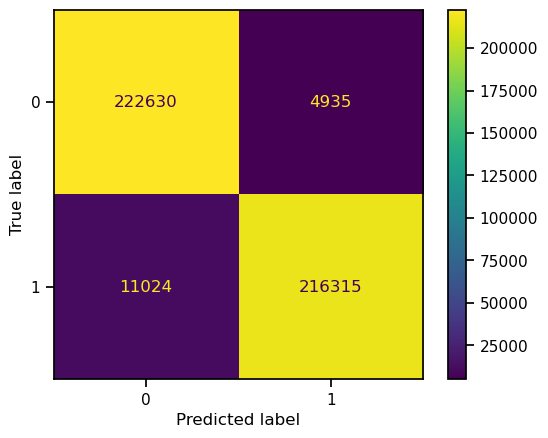

In [ ]:
# Evaluate the Train set
print(classification_report(y_train, lr_tuned_train_preds))
lr_tuned_cm_train = confusion_matrix(y_train, lr_tuned_train_preds)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = lr_tuned_cm_train, display_labels = lr_tuned.classes_).plot()

# Evaluation Scores
roc_auc = round(roc_auc_score(y_train, lr_tuned_train_preds), 4)
accuracy = round(accuracy_score(y_train, lr_tuned_train_preds), 4)
recall = round(recall_score(y_train, lr_tuned_train_preds), 4)
precision = round(precision_score(y_train, lr_tuned_train_preds), 4)
f_one = round(f1_score(y_train, lr_tuned_train_preds), 4)

# Return evaluation scores
print(f"========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"========================")

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56750
           1       0.98      0.95      0.96     56976

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

 ROC-AUC Score: 0.9653
 Accuracy Score: 0.9653
 Recall Score: 0.9528
 Precision Score: 0.9773
 F1-score: 0.9649


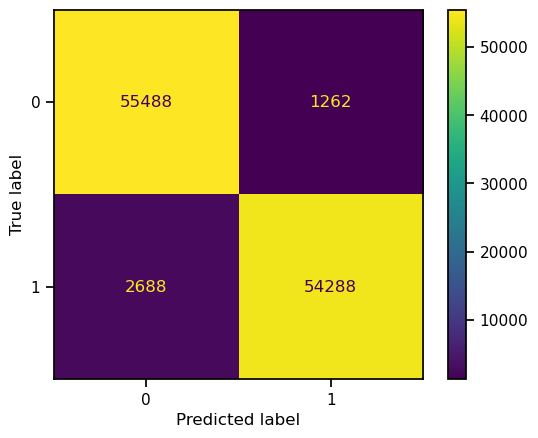

In [ ]:
# Evaluate the Test set
print(classification_report(y_test, lr_tuned_test_preds))
lr_tuned_cm_test = confusion_matrix(y_test, lr_tuned_test_preds)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = lr_tuned_cm_test, display_labels = lr_tuned.classes_).plot()

# Evaluation Scores
roc_auc = round(roc_auc_score(y_test, lr_tuned_test_preds), 4)
accuracy = round(accuracy_score(y_test, lr_tuned_test_preds), 4)
recall = round(recall_score(y_test, lr_tuned_test_preds), 4)
precision = round(precision_score(y_test, lr_tuned_test_preds), 4)
f_one = round(f1_score(y_test, lr_tuned_test_preds), 4)

# Return evaluation scores
print(f"========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"========================")

#### Decision Tree Hyperparameter Tuning

In [ ]:
# define some candidate parameter values
params_grid = {
    'max_depth': [1, 3, 5, 7, 8, 10, 12, 14, 15, 17, 18, 20],
    'min_samples_split': [8, 10, 12, 18, 20, 16]
}

# Define multiple scoring metrics
scoring_metrics = {
    "ROC-AUC": make_scorer(roc_auc_score),
    'accuracy': make_scorer(accuracy_score),
    "recall": make_scorer(recall_score),
    "precision": make_scorer(precision_score),
    'f1': make_scorer(f1_score, average='weighted')
}

# Instantiate the grid search with the model and the hyperparameters
grid_search = GridSearchCV(estimator=DT, param_grid=params_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring=scoring_metrics, refit = "ROC-AUC")

# Search the best parameters with training data
grid_search.fit(X_train, y_train)

# Search the best parameters with training data
dt_best_params = grid_search.best_params_
print("Best Hyperparameters:", dt_best_params)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 8}


In [ ]:
# Define the best hyperparameters
max_depth = dt_best_params["max_depth"]
min_samples_split = dt_best_params["min_samples_split"]

# Re-create the Logistic Regression class instance with the defined hyperparameters
dt_tuned = DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split)

# Fitting the model with training data
dt_tuned.fit(X_train, y_train)

# Re-predict the train and test set
dt_tuned_train_preds = dt_tuned.predict(X_train)
dt_tuned_test_preds = dt_tuned.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227565
           1       1.00      1.00      1.00    227339

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904

 ROC-AUC Score: 0.9993
 Accuracy Score: 0.9993
 Recall Score: 0.9998
 Precision Score: 0.9987
 F1-score: 0.9993


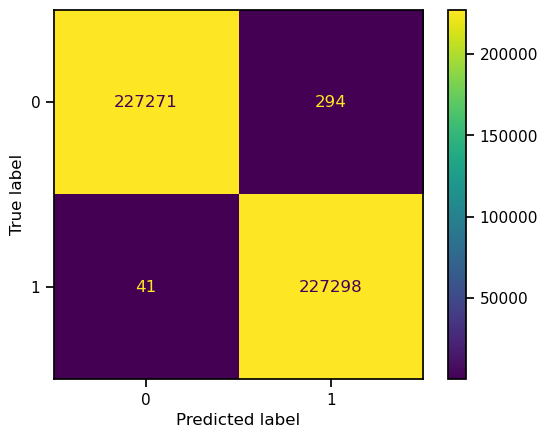

In [ ]:
# Evaluate the Train set
print(classification_report(y_train, dt_tuned_train_preds))
dt_tuned_cm_train = confusion_matrix(y_train, dt_tuned_train_preds)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = dt_tuned_cm_train, display_labels = dt_tuned.classes_).plot()

# Evaluation Scores
roc_auc = round(roc_auc_score(y_train, dt_tuned_train_preds), 4)
accuracy = round(accuracy_score(y_train, dt_tuned_train_preds), 4)
recall = round(recall_score(y_train, dt_tuned_train_preds), 4)
precision = round(precision_score(y_train, dt_tuned_train_preds), 4)
f_one = round(f1_score(y_train, dt_tuned_train_preds), 4)

# Return evaluation scores
print(f"========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"========================")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

 ROC-AUC Score: 0.9977
 Accuracy Score: 0.9977
 Recall Score: 0.9989
 Precision Score: 0.9965
 F1-score: 0.9977


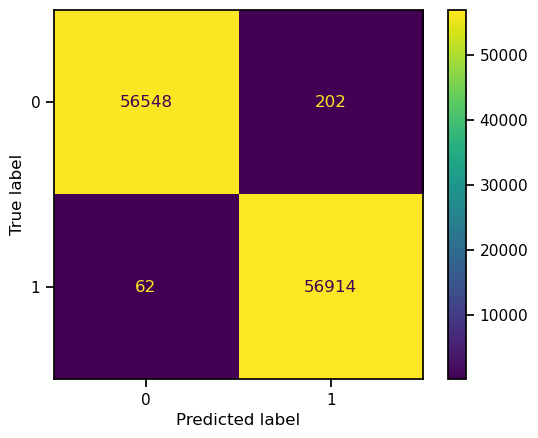

In [ ]:
# Evaluate the Test set
print(classification_report(y_test, dt_tuned_test_preds))
dt_tuned_cm_test = confusion_matrix(y_test, dt_tuned_test_preds)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = dt_tuned_cm_test, display_labels = dt_tuned.classes_).plot()

# Evaluation Scores
roc_auc = round(roc_auc_score(y_test, dt_tuned_test_preds), 4)
accuracy = round(accuracy_score(y_test, dt_tuned_test_preds), 4)
recall = round(recall_score(y_test, dt_tuned_test_preds), 4)
precision = round(precision_score(y_test, dt_tuned_test_preds), 4)
f_one = round(f1_score(y_test, dt_tuned_test_preds), 4)

# Return evaluation scores
print(f"========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"========================")

#### KNN Hyperparameter Tuning

In [ ]:
# Define the hyperparameters and their possible values
params_grid = {
    'n_neighbors' : [5,7,9,11,13,15],
    'weights' : ['uniform','distance'],
    'metric' : ['minkowski','euclidean','manhattan']
}

# Define multiple scoring metrics
scoring_metrics = {
    "ROC-AUC": make_scorer(roc_auc_score),
    'accuracy': make_scorer(accuracy_score),
    "recall": make_scorer(recall_score),
    "precision": make_scorer(precision_score),
    'f1': make_scorer(f1_score, average='weighted')
}

# Instantiate the grid search with the model and the hyperparameters
grid_search = GridSearchCV(estimator=KNC, param_grid=params_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring=scoring_metrics, refit='ROC-AUC')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
KNC_best_params = grid_search.best_params_
print("Best Hyperparameters:", KNC_best_params)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   9.4s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time= 1.6min
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=  34.7s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   7.6s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   8.2s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time= 5.4min
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=  31.3s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=  38.7s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=10.1min
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=  55.7s
[CV] END .......................C=1, penalty=l1, solver=saga; total time= 9.3min
[CV] END .................C=10, penalty=l1, sol

In [ ]:
# Define the best hyperparameters
n_neighbors = KNC_best_params["n_neighbors"]
weights = KNC_best_params["weights"]
metric = KNC_best_params["metric"]

# Re-create the Logistic Regression class instance with the defined hyperparameters
knc_tuned = KNeighborsClassifier(n_neighbors = n_neighbors, weights = weights, metric = metric)

# Fitting the model with training data
knc_tuned.fit(X_train, y_train)

# Re-predict the train and test set
knc_tuned_train_preds = knc_tuned.predict(X_train)
knc_tuned_test_preds = knc_tuned.predict(X_test)

[CV] END ...................C=0.001, penalty=l1, solver=saga; total time= 1.5min
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=  48.6s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   7.7s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   8.4s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time= 1.5min
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time= 6.2min
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 2.9min
[CV] END .....................C=0.1, penalty=l2, solver=saga; total time= 8.4min
[CV] END .......................C=1, penalty=l2, solver=saga; total time= 7.7min
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=  44.6s
[CV] END ......................C=10, penalty=l1, solver=saga; total time= 8.5min
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=  50.3s
[CV] END ...................

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227565
           1       1.00      1.00      1.00    227339

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904

 ROC-AUC Score: 1.0
 Accuracy Score: 1.0
 Recall Score: 1.0
 Precision Score: 1.0
 F1-score: 1.0


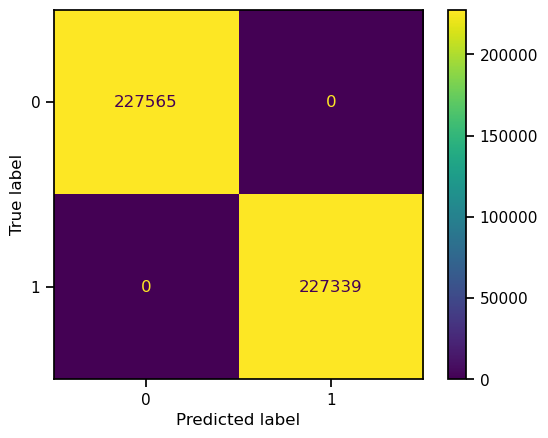

In [ ]:
# Evaluate the Train set
print(classification_report(y_train, knc_tuned_train_preds))
knc_tuned_cm_train = confusion_matrix(y_train, knc_tuned_train_preds)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = knc_tuned_cm_train, display_labels = KNC_reduced.classes_).plot()

# Evaluation Scores
roc_auc = round(roc_auc_score(y_train, knc_tuned_train_preds), 4)
accuracy = round(accuracy_score(y_train, knc_tuned_train_preds), 4)
recall = round(recall_score(y_train, knc_tuned_train_preds), 4)
precision = round(precision_score(y_train, knc_tuned_train_preds), 4)
f_one = round(f1_score(y_train, knc_tuned_train_preds), 4)

# Return evaluation scores
print(f"=========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"=========================")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

 ROC-AUC Score: 0.9984
 Accuracy Score: 0.9984
 Recall Score: 1.0
 Precision Score: 0.9969
 F1-score: 0.9984


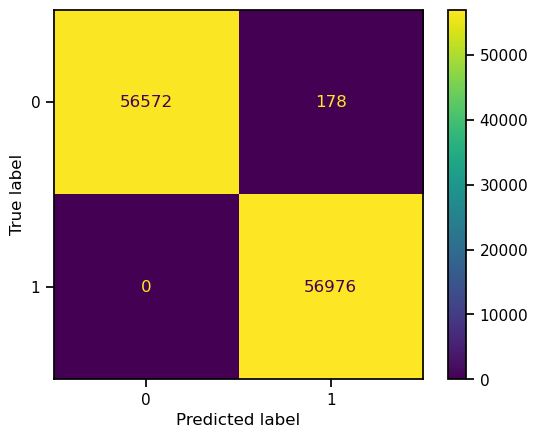

In [ ]:
# Evaluate the Test set
print(classification_report(y_test, knc_tuned_test_preds))
knc_tuned_cm_test = confusion_matrix(y_test, knc_tuned_test_preds)
sns.set_context("notebook")
ConfusionMatrixDisplay(confusion_matrix = knc_tuned_cm_test, display_labels = KNC_reduced.classes_).plot()

# Evaluation Scores
roc_auc = round(roc_auc_score(y_test, knc_tuned_test_preds), 4)
accuracy = round(accuracy_score(y_test, knc_tuned_test_preds), 4)
recall = round(recall_score(y_test, knc_tuned_test_preds), 4)
precision = round(precision_score(y_test, knc_tuned_test_preds), 4)
f_one = round(f1_score(y_test, knc_tuned_test_preds), 4)

# Return evaluation scores
print(f"=========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"=========================")

#### Summary

**fine-tuned K-Nearest Neighbors with original dataset** was outperformed the most.